In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import interp
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

plt.rcParams.update({'figure.max_open_warning': 0})

Please adjust the path to your local file.

In [2]:
test = pd.read_csv(r'C:\Eyal\ML project\test_without_target.csv').drop('Unnamed: 0', axis=1) # Drop 1st column
train = pd.read_csv(r'C:\Eyal\ML project\train.csv')

# Part 1 - Data Exploration

In [3]:
train.head()

0          1    2     3      4  5    6         7         8   9  ...  \
0  1.170981   5.672133  0.6  80.0   76.0  D  a21  1.107143  0.692857   5  ...   
1  2.595788  23.203289  6.4  43.0   64.0  N   a9  1.700000  0.614286  11  ...   
2  0.972794   7.127348  0.4  63.0  100.0  C   a4  1.242857  0.428571   6  ...   
3  1.891667  17.881507  4.2  65.0   71.0  K  a15  1.050000  0.671429  10  ...   
4  1.965881  13.936969  3.2  40.0   62.0  F   a1  1.950000  1.085714   3  ...   

     16    17  18   19    20    21    22     23          24 label  
0  13.9  12.2   D    D  28.0   7.0  2011   40.0   15.420787     1  
1  18.6  16.5   N    I  61.0  43.0  2012  110.0  240.496883     0  
2  16.5   9.6   M  NaN  15.0   7.0  2012    0.0  224.282903     0  
3  14.2  11.4   K    D  39.0  24.0  2010  130.0   86.810830     0  
4  26.6  23.4   C  NaN  30.0  20.0  2011    0.0  120.642922     0  

[5 rows x 26 columns]

In [4]:
# create a new dataframe that includes only the features
features = train.drop('label', axis=1).copy()
# create a series for the labels
labels = train['label'].copy()

In [4]:
# shape of features DF
features.shape

(22161, 25)

In [5]:
# General overview of the numerical features
features.describe()

0             1             2             3             4  \
count  22161.000000  22161.000000  22161.000000  22102.000000  22057.000000   
mean       2.185958     19.797754      4.929620     51.547009     68.497982   
std        0.815080     10.763614      3.572644     20.184353     18.231315   
min       -0.490607      2.437300      0.000000      1.000000      3.000000   
25%        1.622068     12.268371      2.400000     37.000000     57.000000   
50%        2.167701     17.833216      4.200000     52.000000     69.000000   
75%        2.720341     25.196446      6.600000     65.000000     82.000000   
max        9.092011    248.877854     81.200000    100.000000    100.000000   

                  7             8             9            10            11  \
count  22154.000000  22143.000000  22161.000000  22161.000000  22055.000000   
mean       1.648476      0.888041      6.429358      0.228284   1015.347014   
std        0.480275      0.461375      3.381488      0.161565      7.011856   
min        0.450000     -0.492857      1.000000     -0.195661    984.500000   
25%        1.271429      0.542857      3.000000      0.136002   1010.600000   
50%        1.607143      0.864286      7.000000      0.206457   1015.300000   
75%        2.007143      1.242857      9.000000      0.278929   1020.000000   
max        3.435714      2.128571     12.000000      0.954076   1038.900000   

                 12            15            16            17            20  \
count  22048.000000  20290.000000  22133.000000  22109.000000  20816.000000   
mean    1017.708572     73.685017     21.617133     17.065837     39.995484   
std        7.085807     37.866780      6.602743      6.409174     13.150807   
min      983.700000      0.000000      3.900000     -0.700000     11.000000   
25%     1013.000000     45.000000     16.500000     12.100000     31.000000   
50%     1017.700000     82.000000     21.000000     16.600000     39.000000   
75%     1022.400000    104.000000     26.400000     21.800000     48.000000   
max     1040.900000    143.000000     46.100000     36.900000    135.000000   

                 21            22            23            24  
count  22062.000000  22161.000000  22061.000000  22061.000000  
mean      19.101577   2010.945264    146.971579    224.835441  
std        8.546933      0.823740     86.609704    160.801099  
min        0.000000   2010.000000      0.000000      0.001355  
25%       13.000000   2010.000000     90.000000    100.144819  
50%       19.000000   2011.000000    130.000000    199.866581  
75%       24.000000   2012.000000    200.000000    316.118054  
max       69.000000   2012.000000    670.000000   1426.459838

In [6]:
# Check features types
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22161 non-null  float64
 1   1       22161 non-null  float64
 2   2       22161 non-null  float64
 3   3       22102 non-null  float64
 4   4       22057 non-null  float64
 5   5       20812 non-null  object 
 6   6       22161 non-null  object 
 7   7       22154 non-null  float64
 8   8       22143 non-null  float64
 9   9       22161 non-null  int64  
 10  10      22161 non-null  float64
 11  11      22055 non-null  float64
 12  12      22048 non-null  float64
 13  13      22161 non-null  object 
 14  14      22161 non-null  object 
 15  15      20290 non-null  float64
 16  16      22133 non-null  float64
 17  17      22109 non-null  float64
 18  18      21951 non-null  object 
 19  19      21141 non-null  object 
 20  20      20816 non-null  float64
 21  21      22062 non-null  float64
 22

Let's create a generic function to analyze different types of features

In [7]:
def feature_analysis(feature, labels=train['label']):
    if feature.dtype=='O': # if an object type
        fix,ax = plt.subplots(figsize=(15,5))
        plot = sns.countplot(feature)
        plot.set_title('Analysis of the Feature:  %s' %(feature.name)+'\n\nBar Plot', weight='bold').set_fontsize('14')
        plot.set_xlabel('Values', weight='bold')
        plot.set_ylabel('Frequency', weight='bold')
        
        fix,ax = plt.subplots(figsize=(15,5))
        plot = sns.countplot(feature, hue=labels)
        plt.title('Grouping by label', weight='bold')
        plot.set_xlabel('Values', weight='bold')
        plot.set_ylabel('Frequency', weight='bold')
    elif feature.dtype == 'float' or feature.dtype=='int64': # if a numeric type
        
        fig,ax = plt.subplots(figsize=(15,5))
        plot = sns.distplot(feature)
        plot.set_title('Analysis of the Feature:  %s' %(feature.name)+'\n\nHistogram Plot', weight='bold').set_fontsize('14')
        
        plot.set_xlabel('Values', weight='bold')
        plot.set_ylabel('Frequency', weight='bold')
   
        fig.tight_layout()
        fig,ax = plt.subplots(figsize=(15,5))
        a = sns.kdeplot(feature[labels[labels==1].index])
        b = sns.kdeplot(feature[labels[labels==0].index])
        plt.legend(['1', '0'], loc='upper right', fancybox=True, framealpha=1, 
                   shadow=True, borderpad=1, title='Label', fontsize='large')
        plt.title('Grouping by label', weight='bold')
        plt.xlabel('Values', weight='bold')
        plt.ylabel('Frequency', weight='bold')
        fig.tight_layout()

    
    

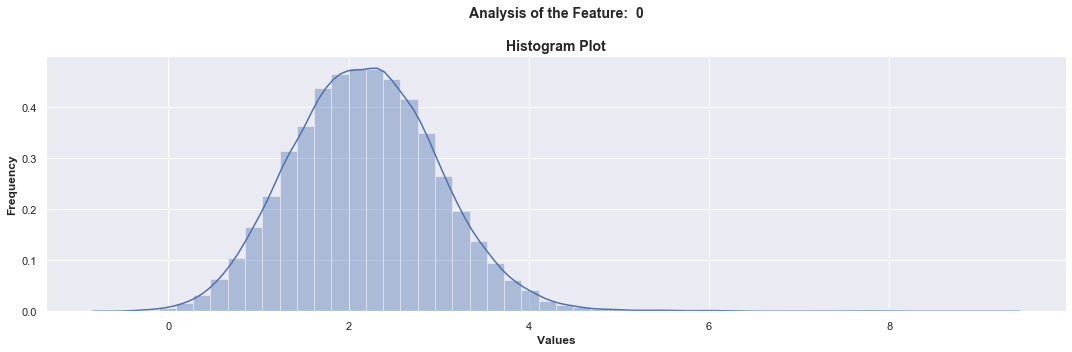

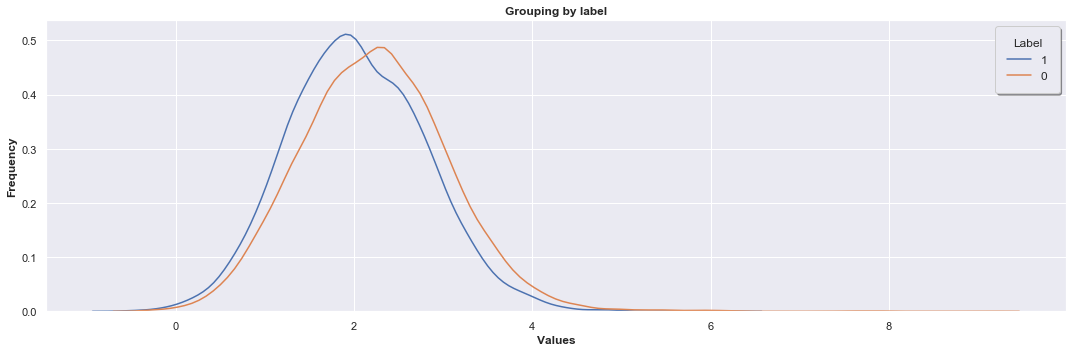

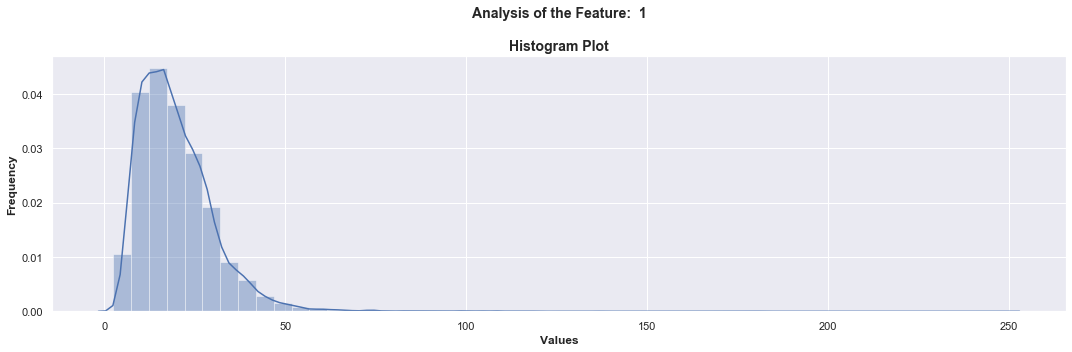

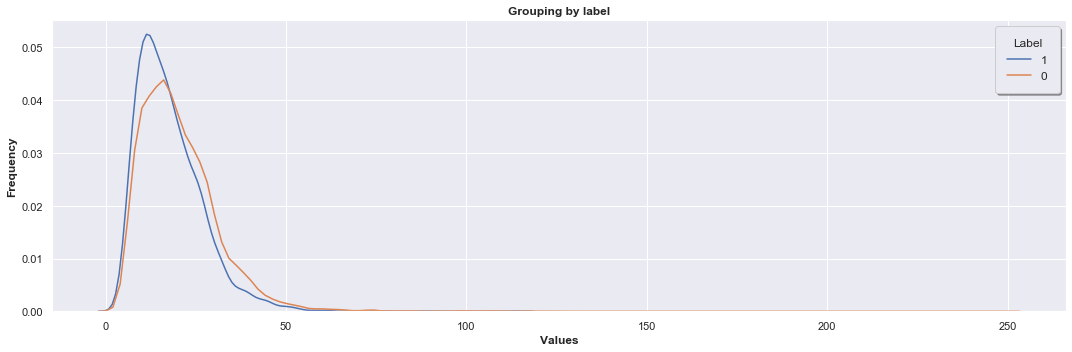

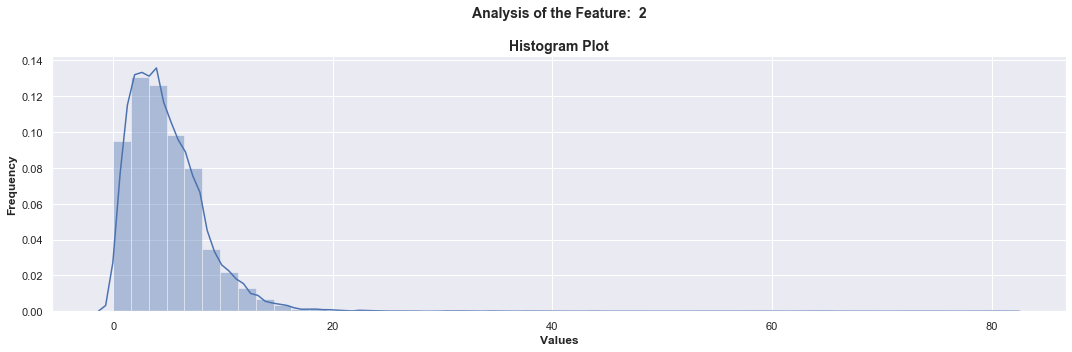

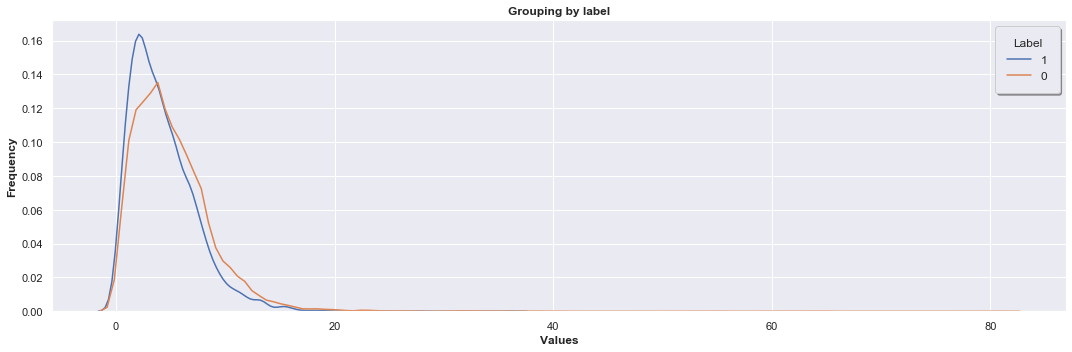

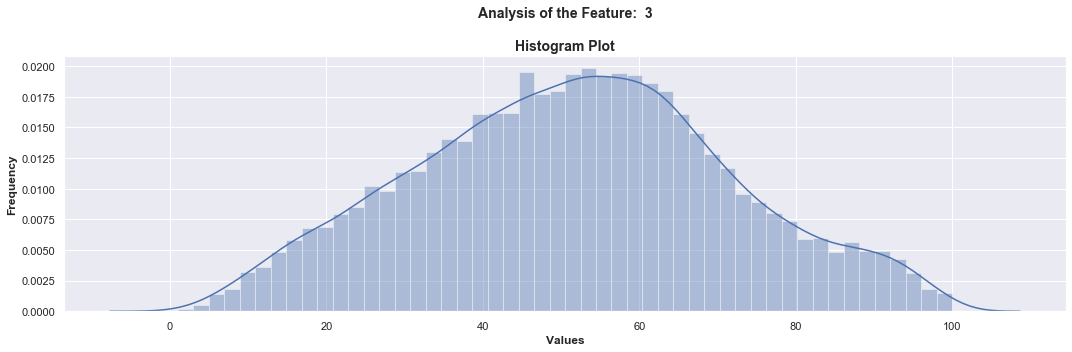

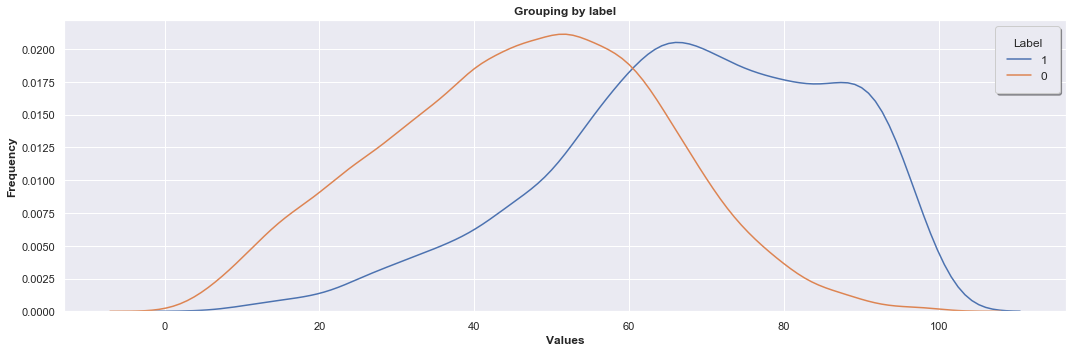

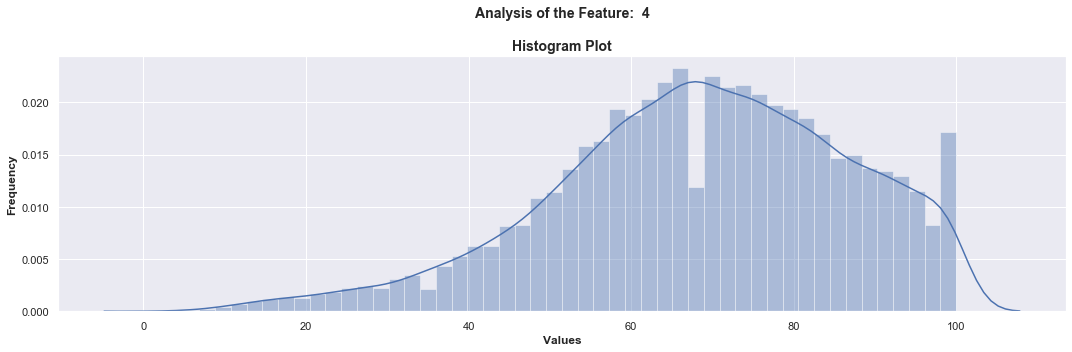

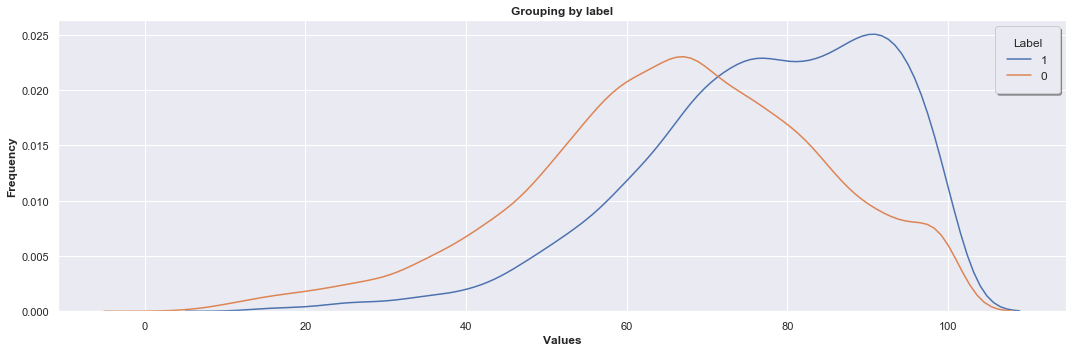

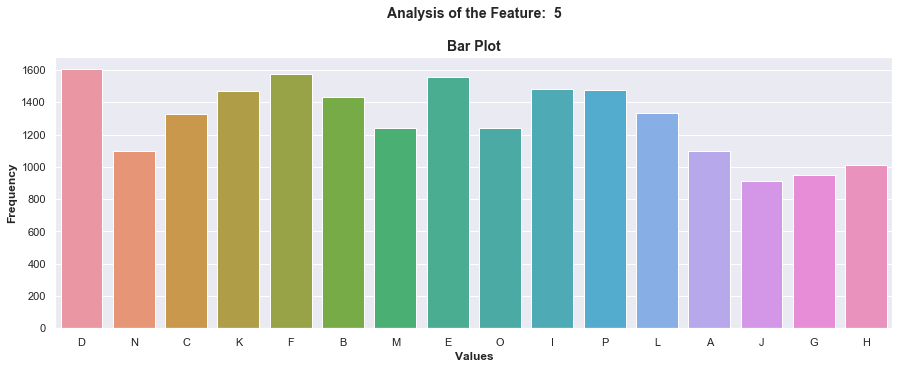

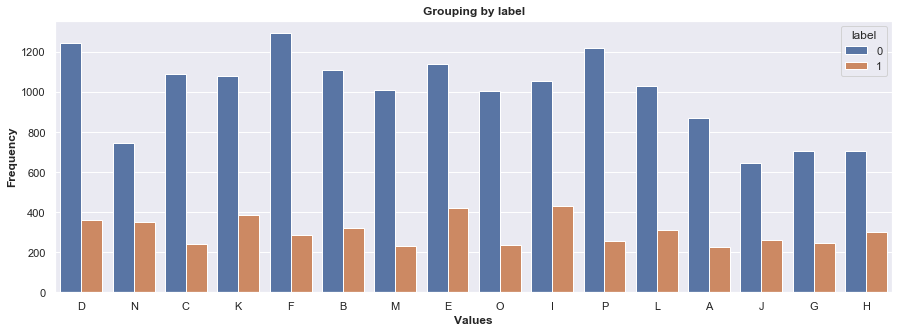

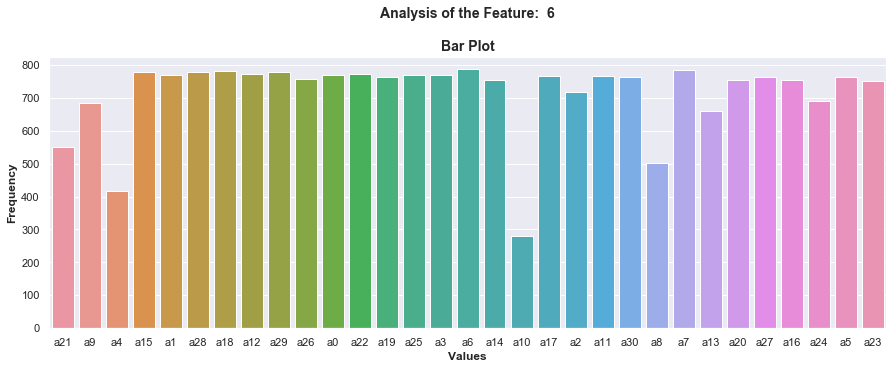

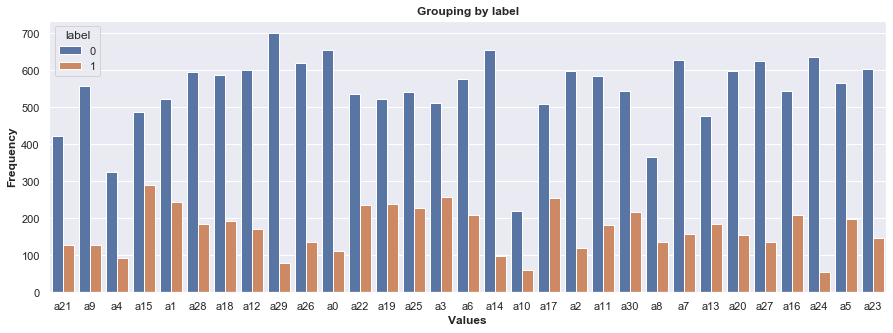

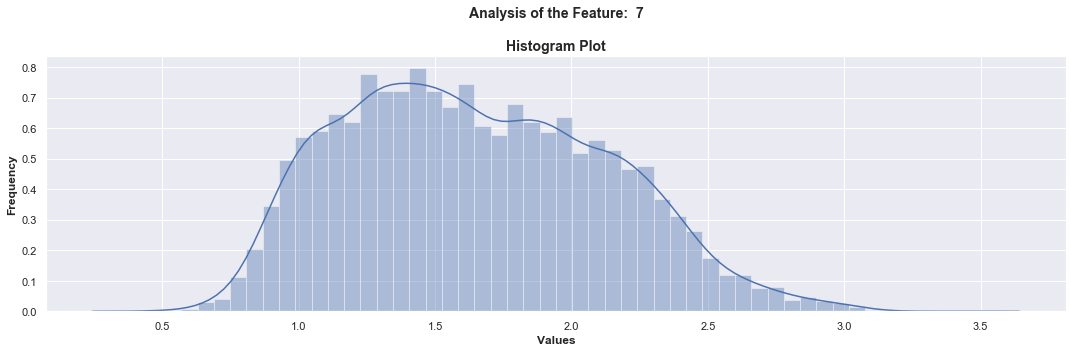

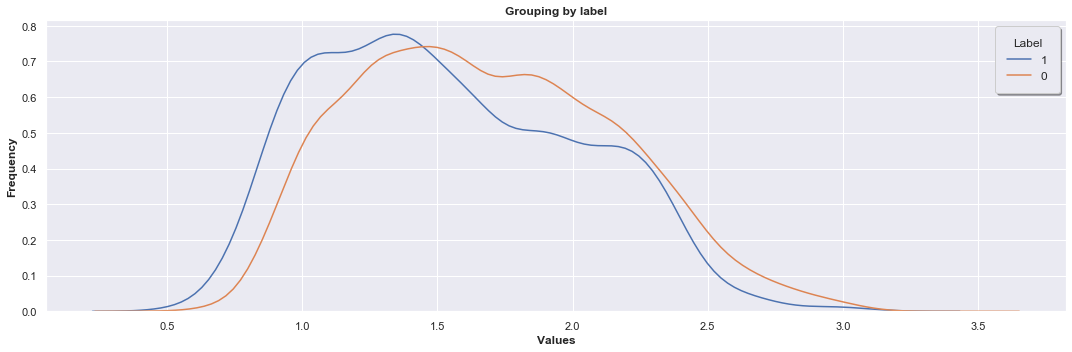

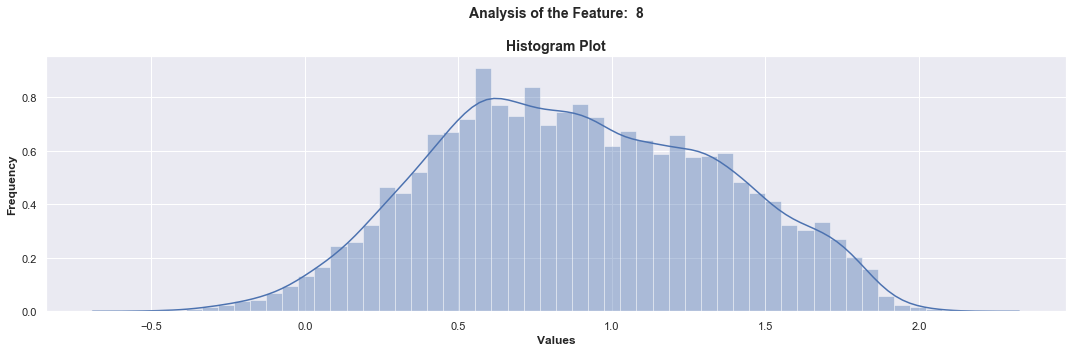

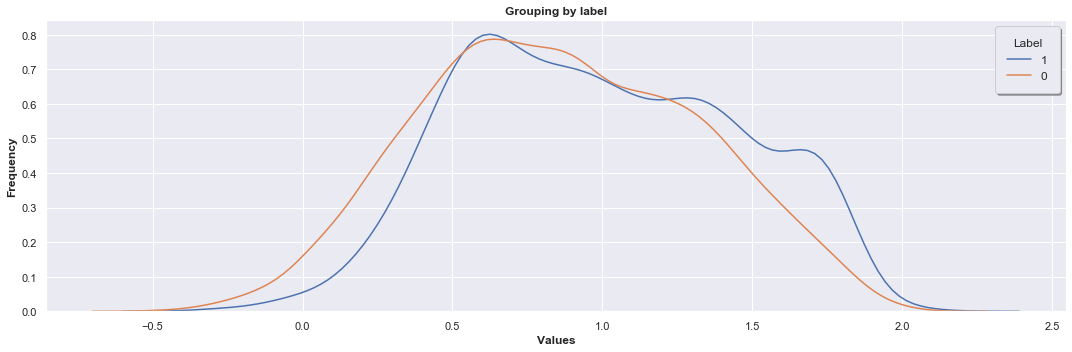

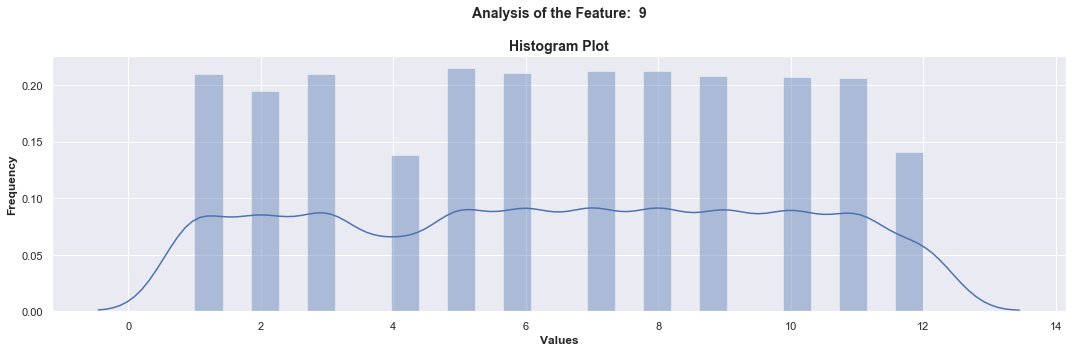

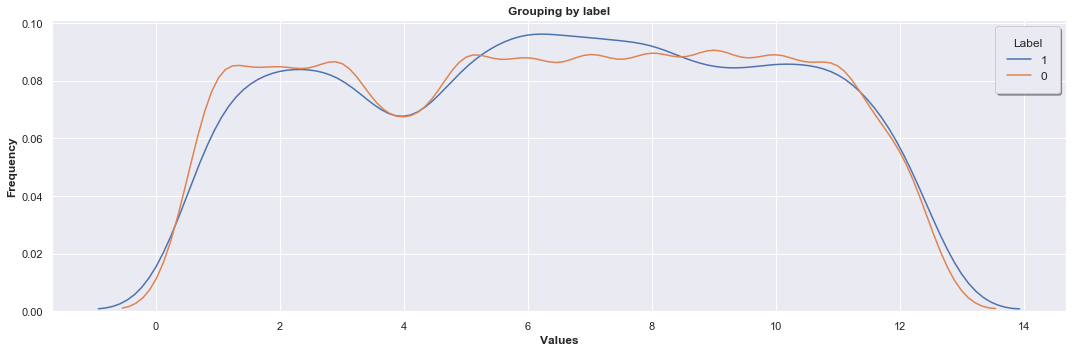

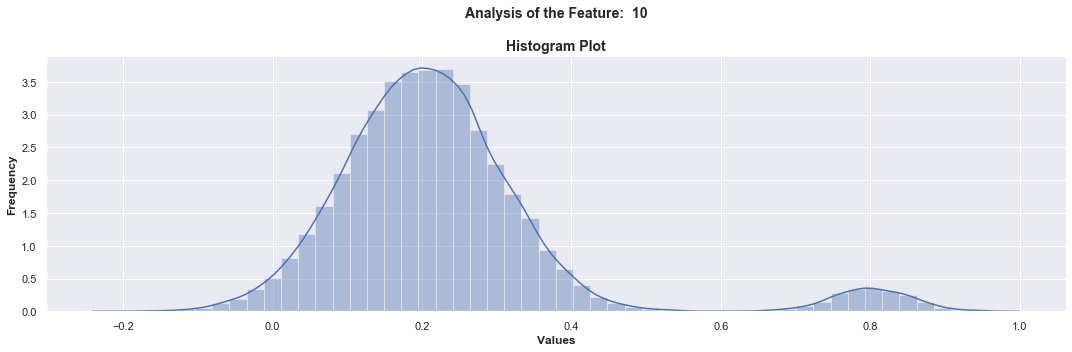

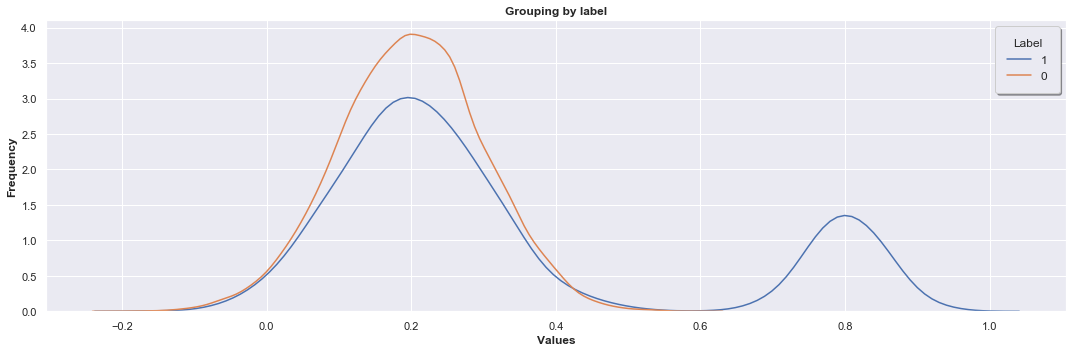

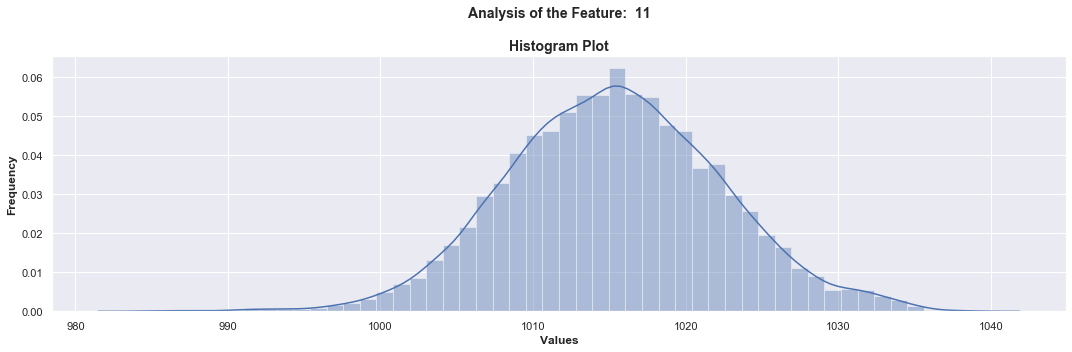

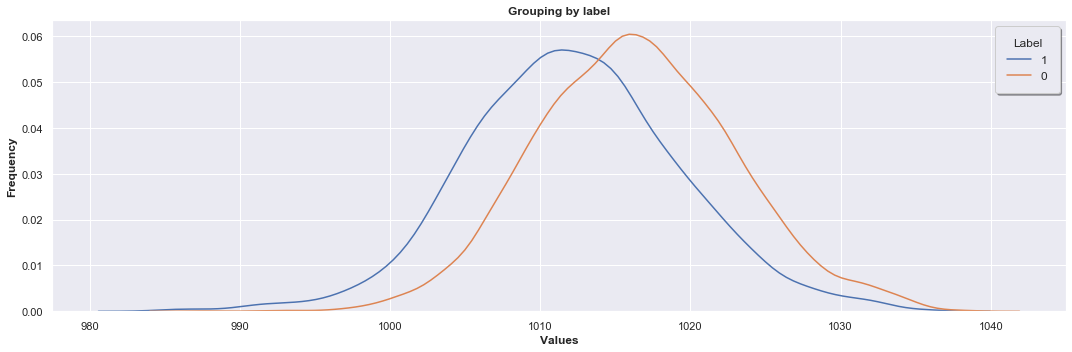

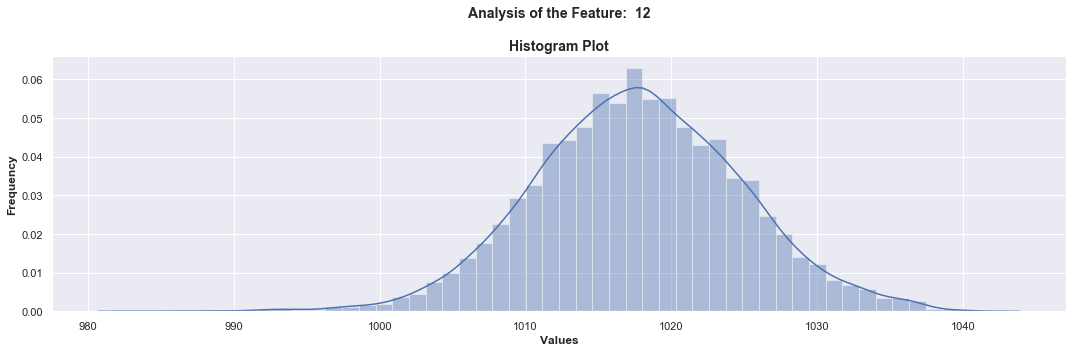

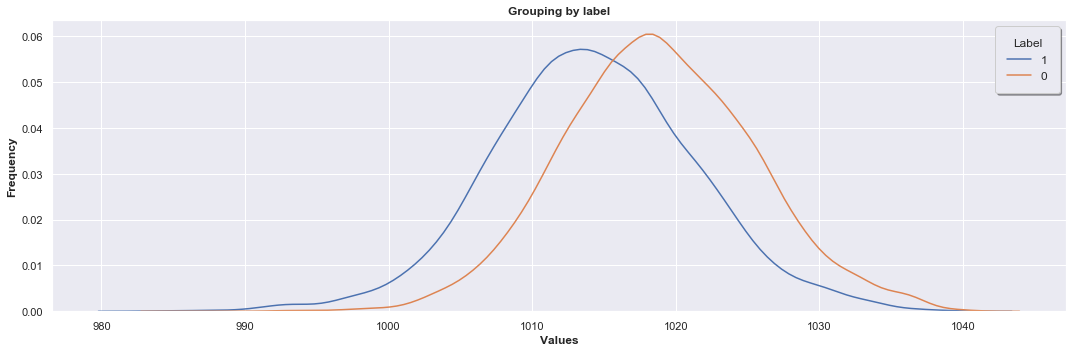

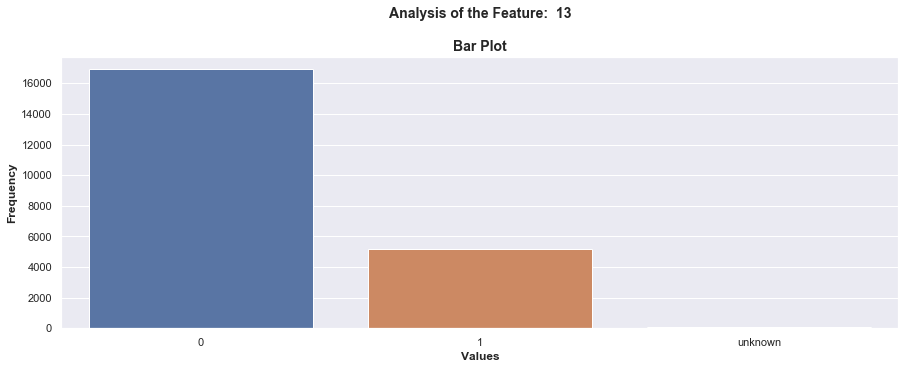

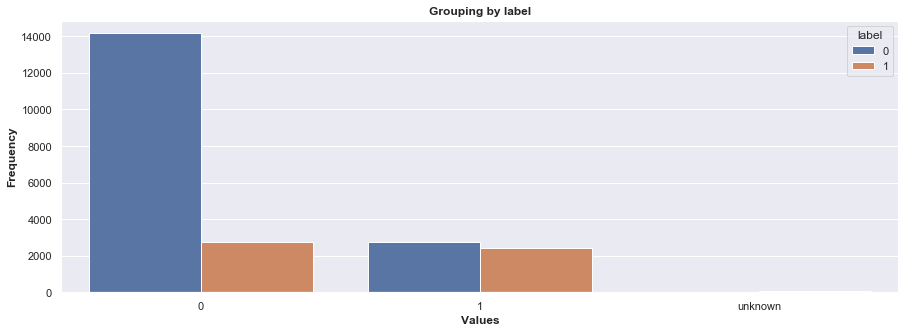

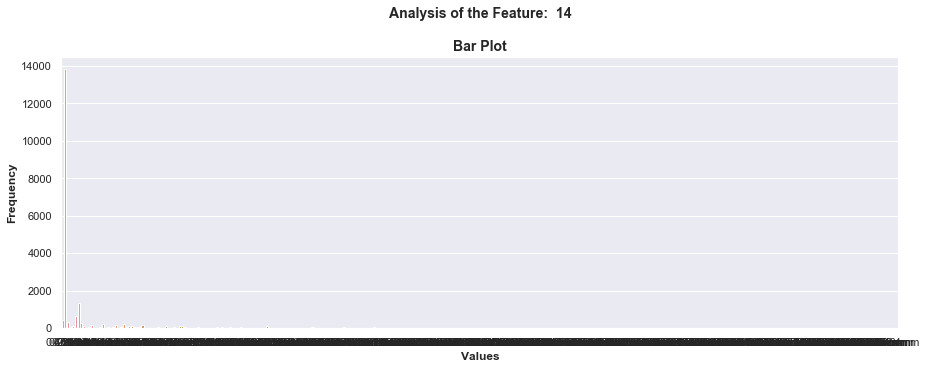

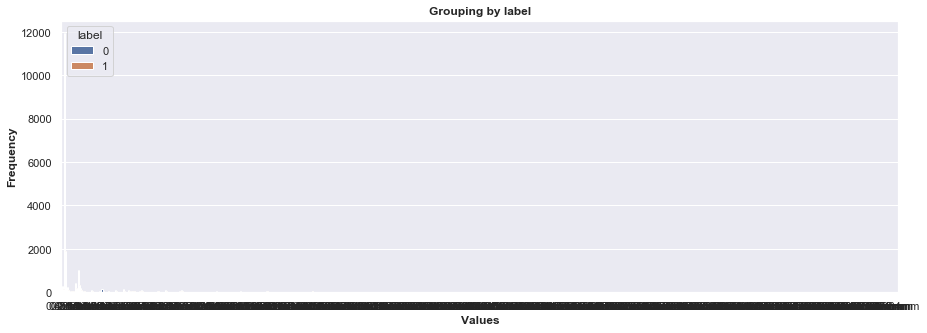

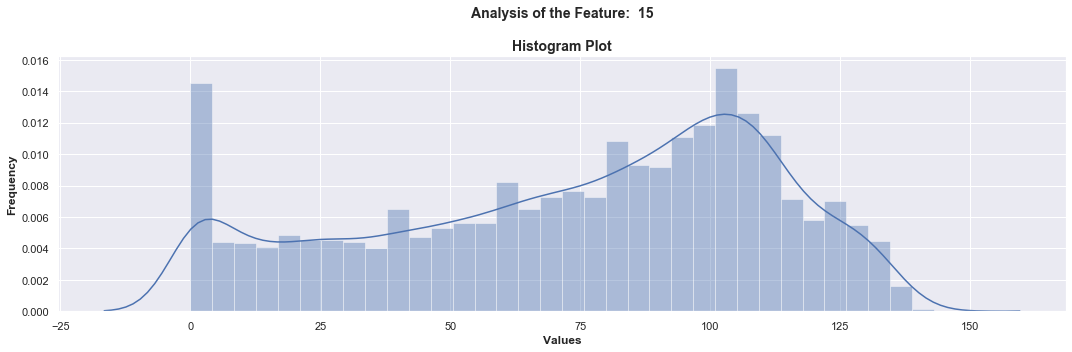

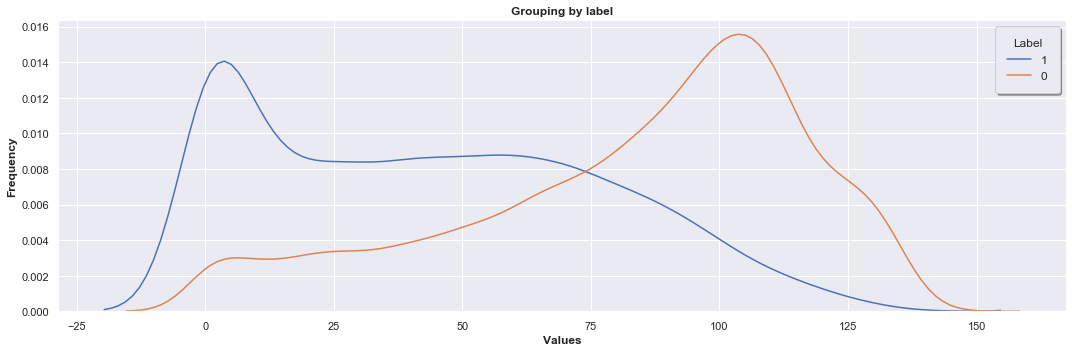

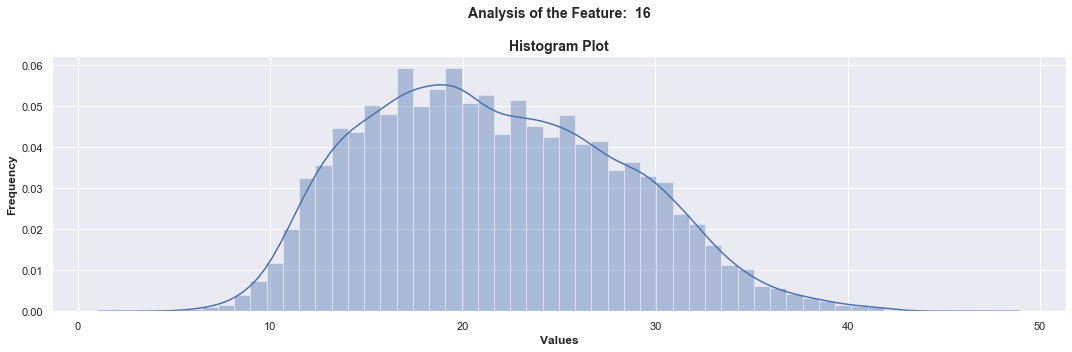

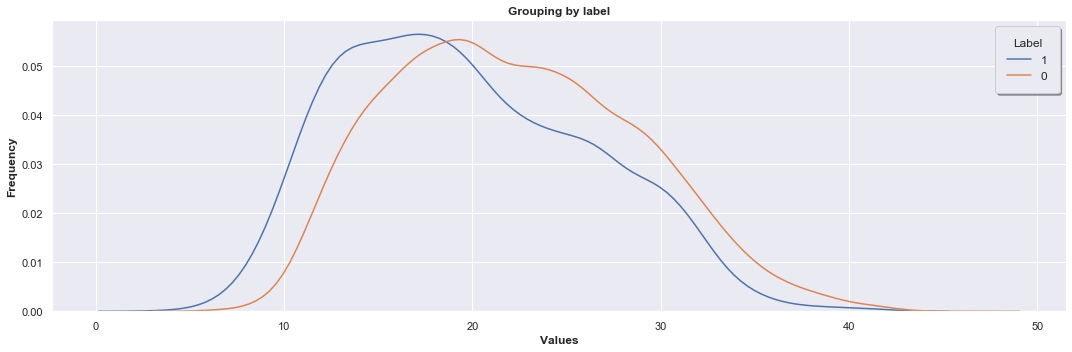

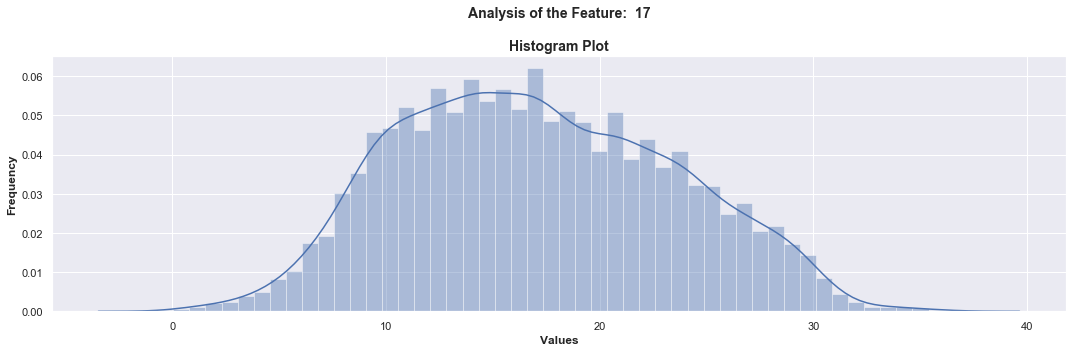

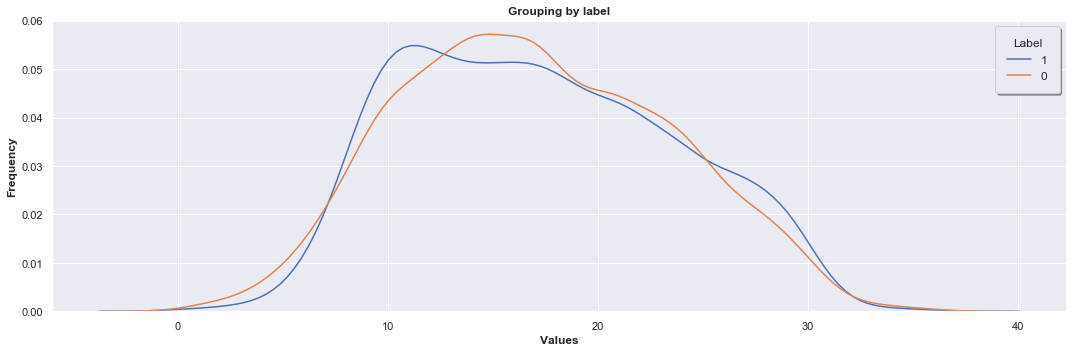

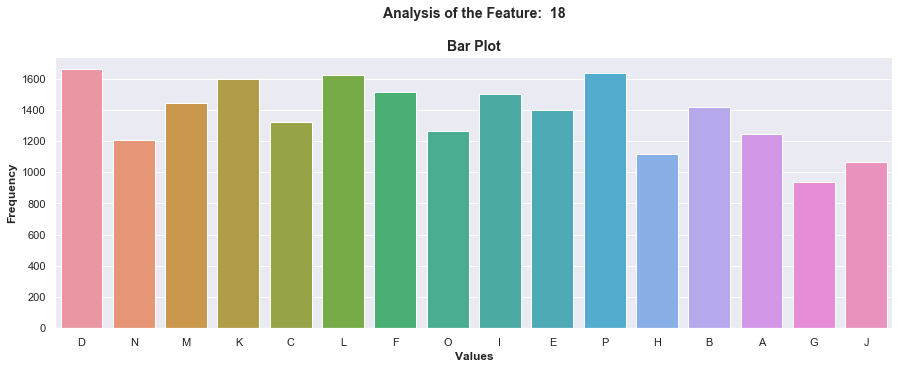

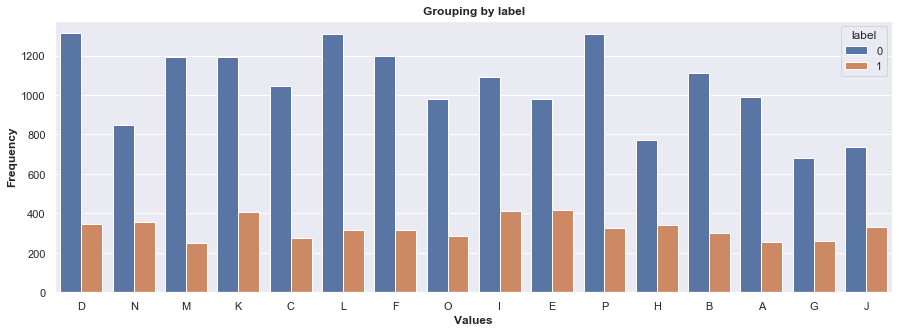

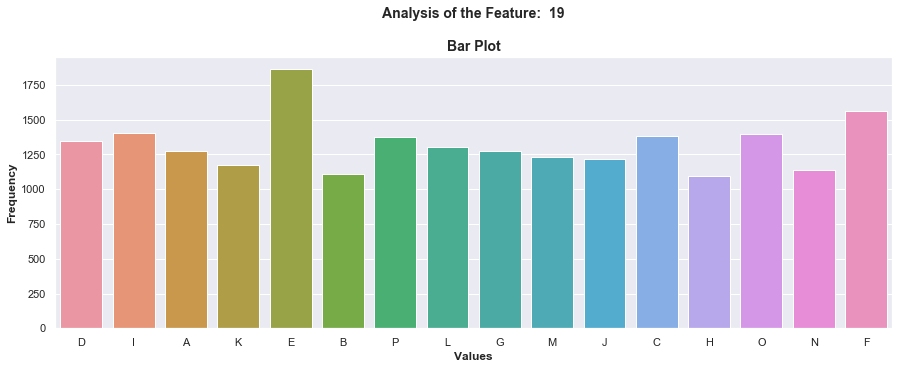

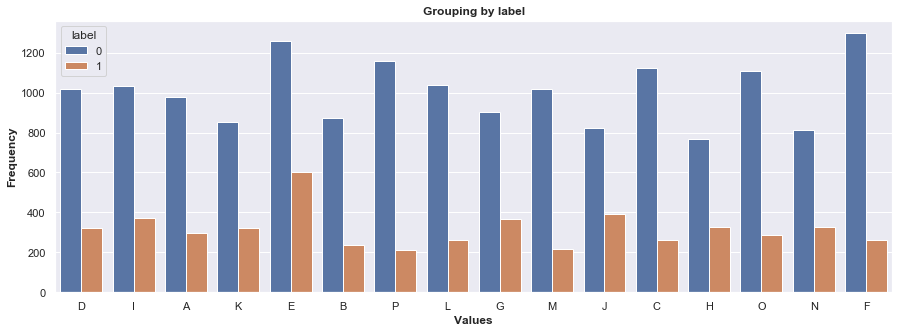

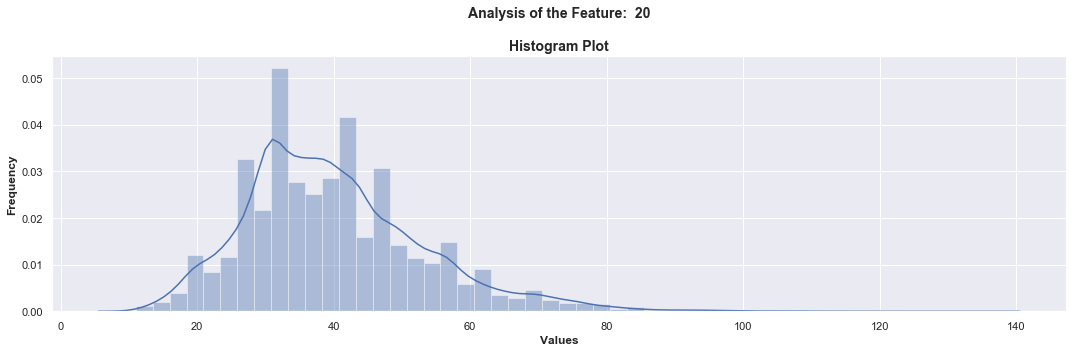

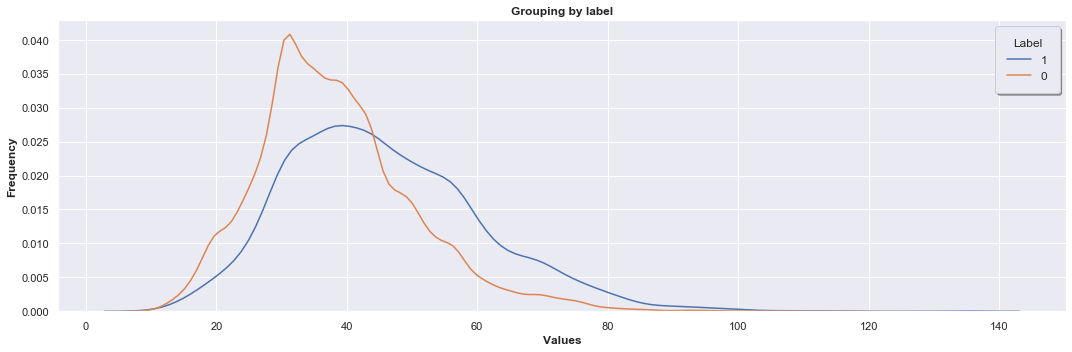

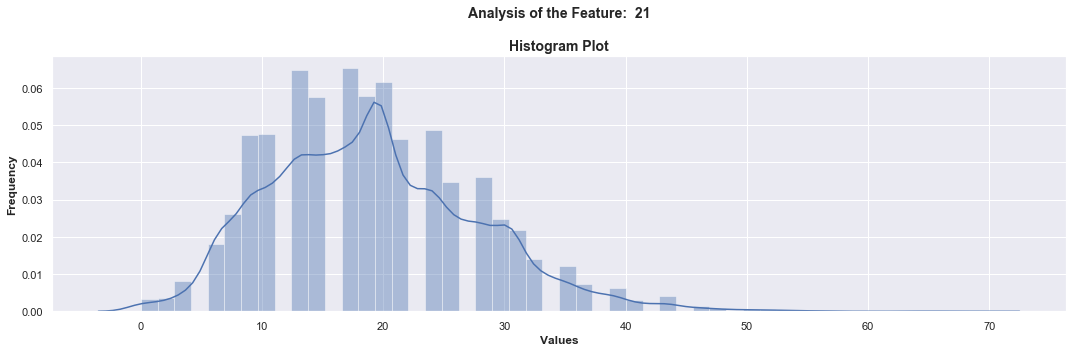

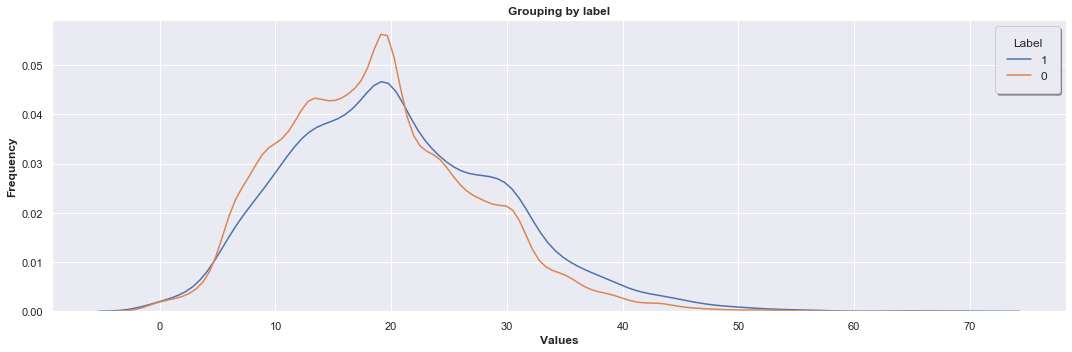

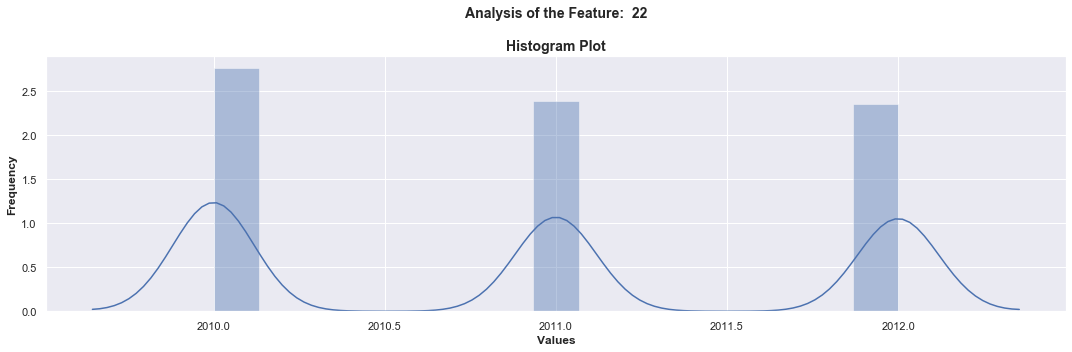

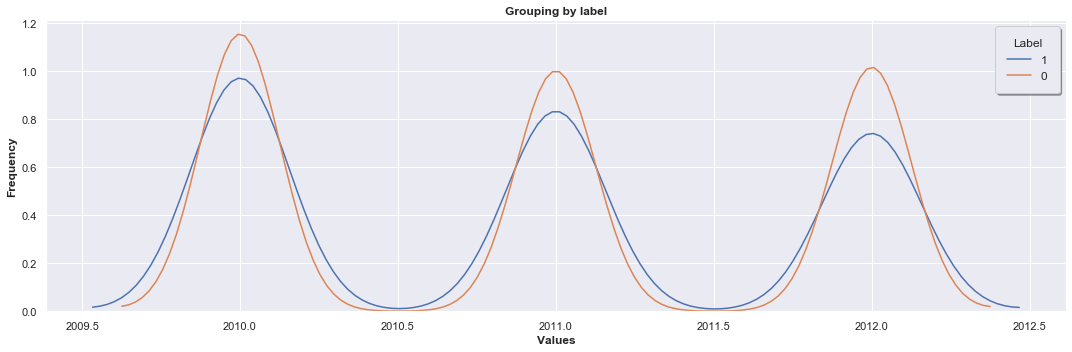

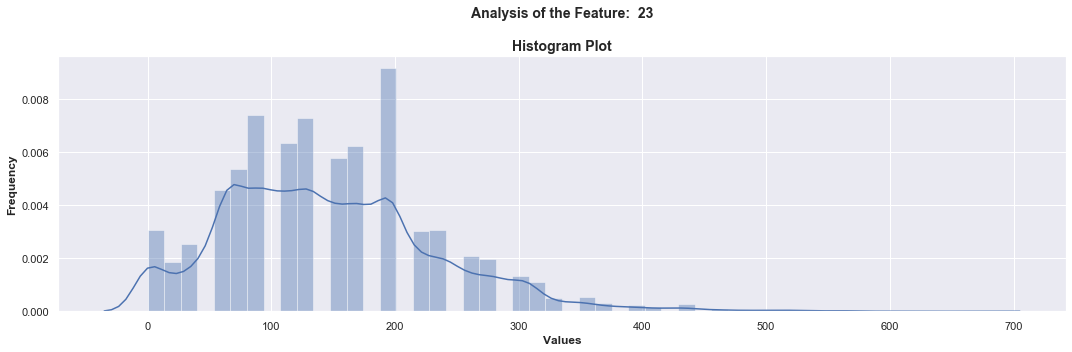

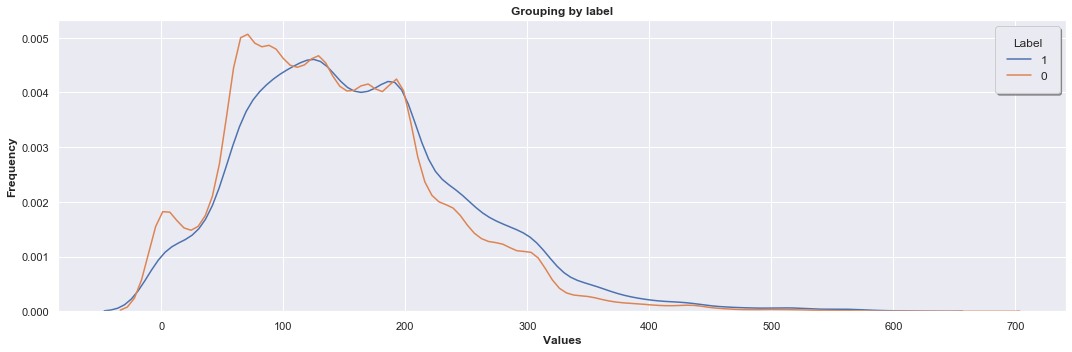

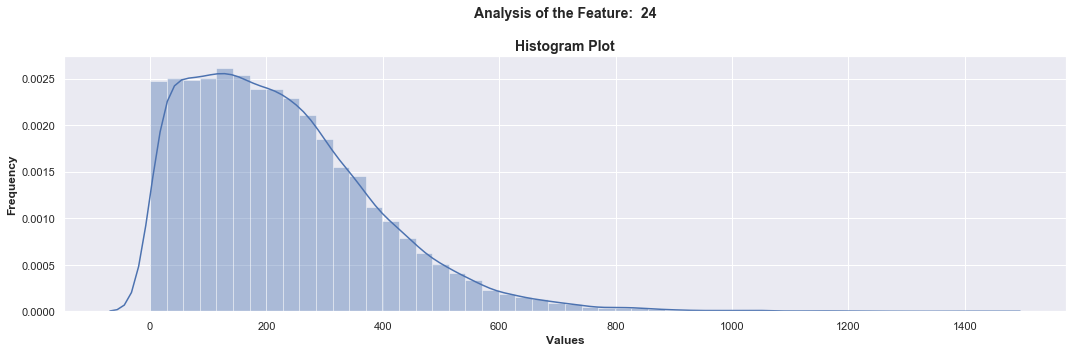

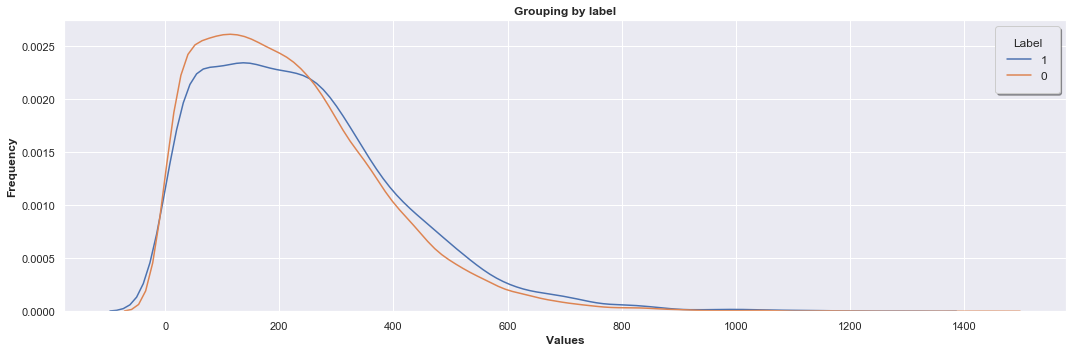

In [8]:
for feature in features.columns:
    feature_analysis(features[feature])

According to the analysis above, feature 14 was not presented correctly. it's values are presented as number + 'mm' which probably refers to Milimetre. Therefore, let's try to convert it to float and run a new analysis.

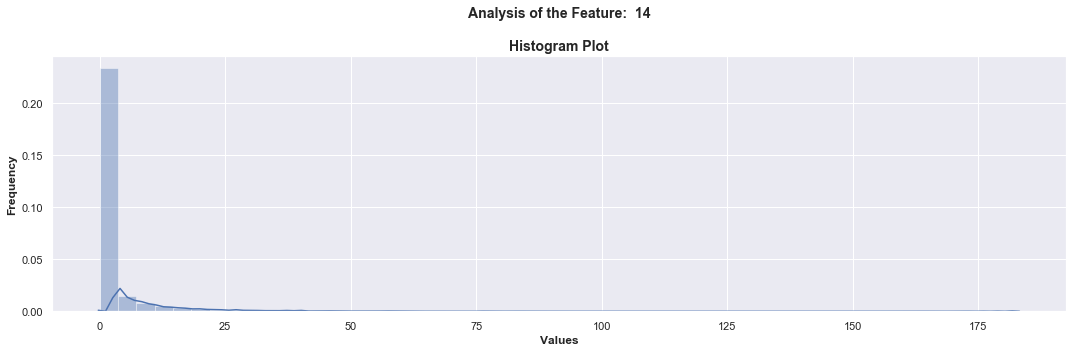

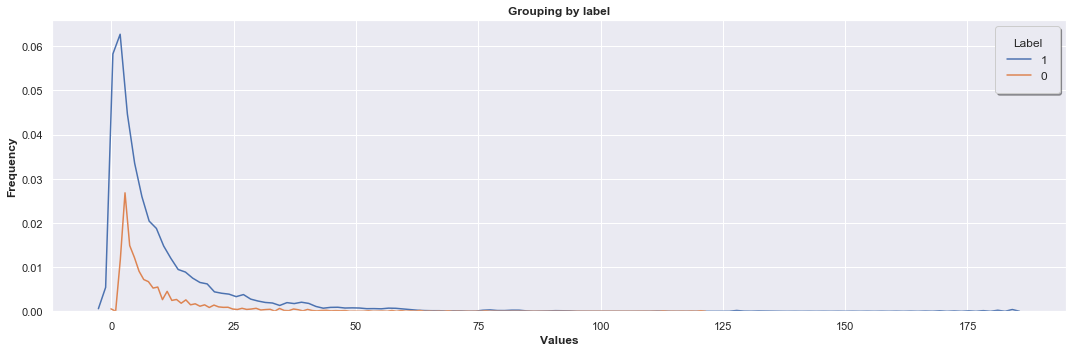

In [9]:
feature_analysis(features['14'].str[:-2].astype(float))

### Correlation heamtap 
A usefule tool to identify possible correlations between features

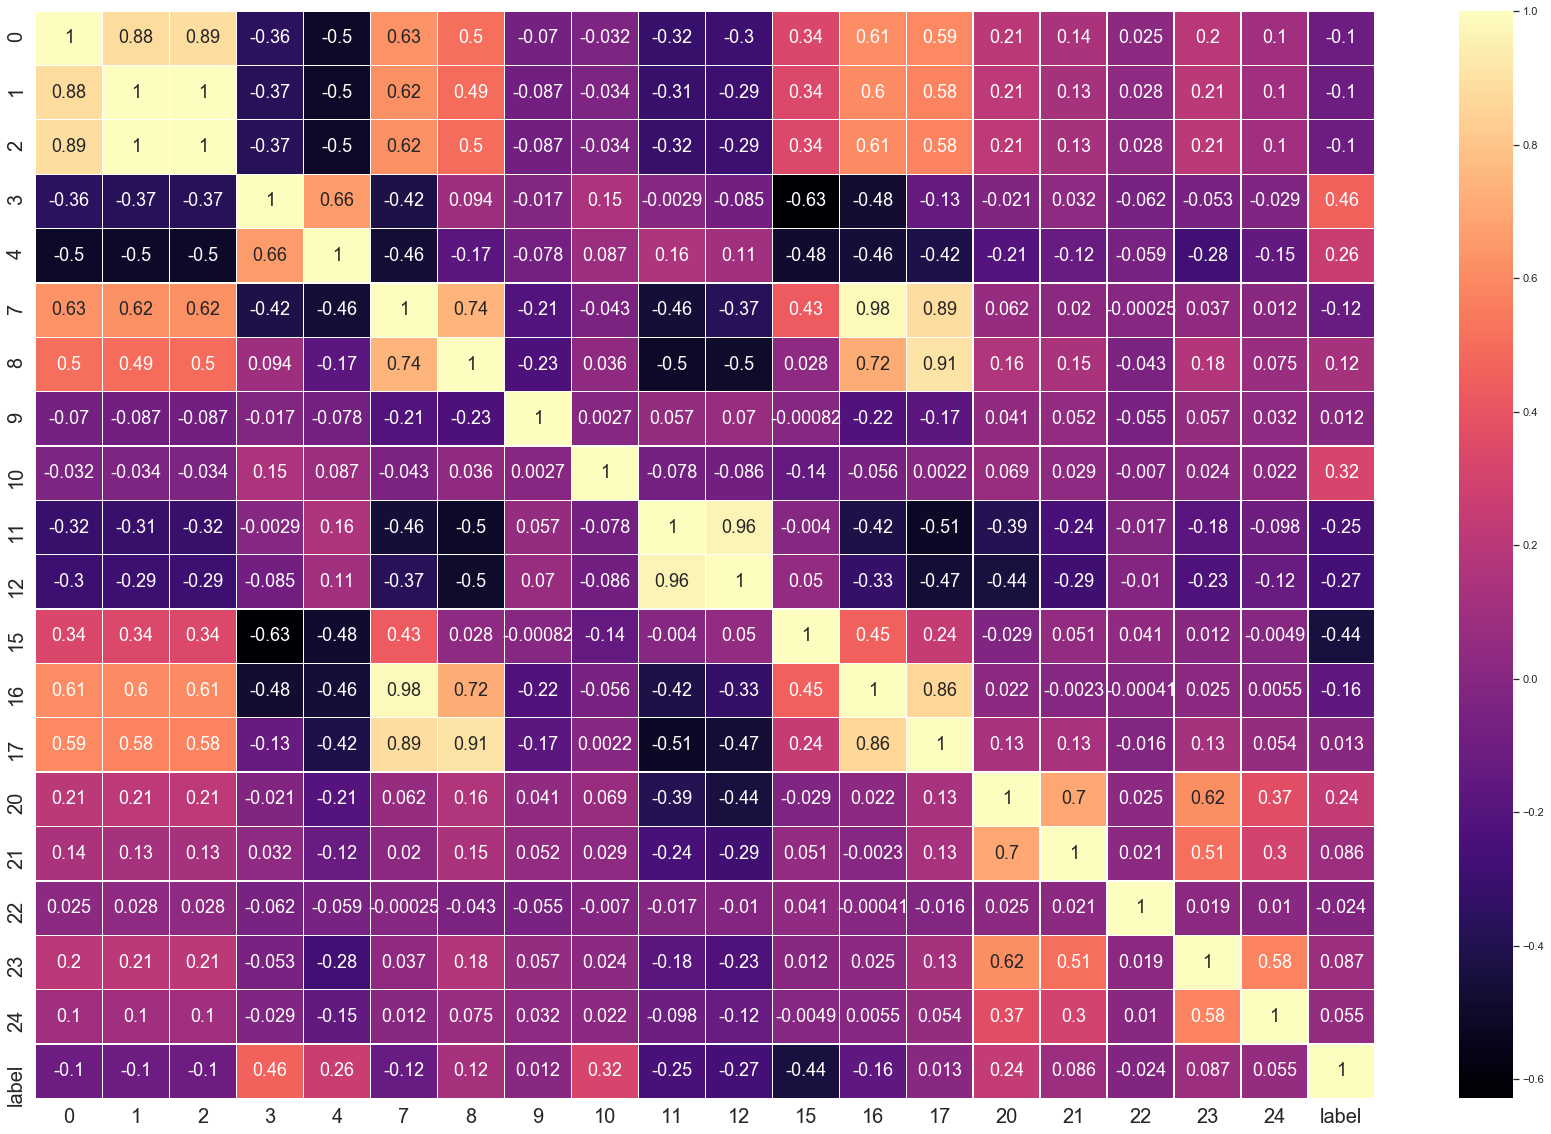

In [5]:
fix,ax = plt.subplots(figsize=(30,20))
sns.heatmap(train.corr(), annot=True, lw=0.3, 
            cmap='magma', annot_kws={"size": 18})
ax.tick_params(labelsize=20)

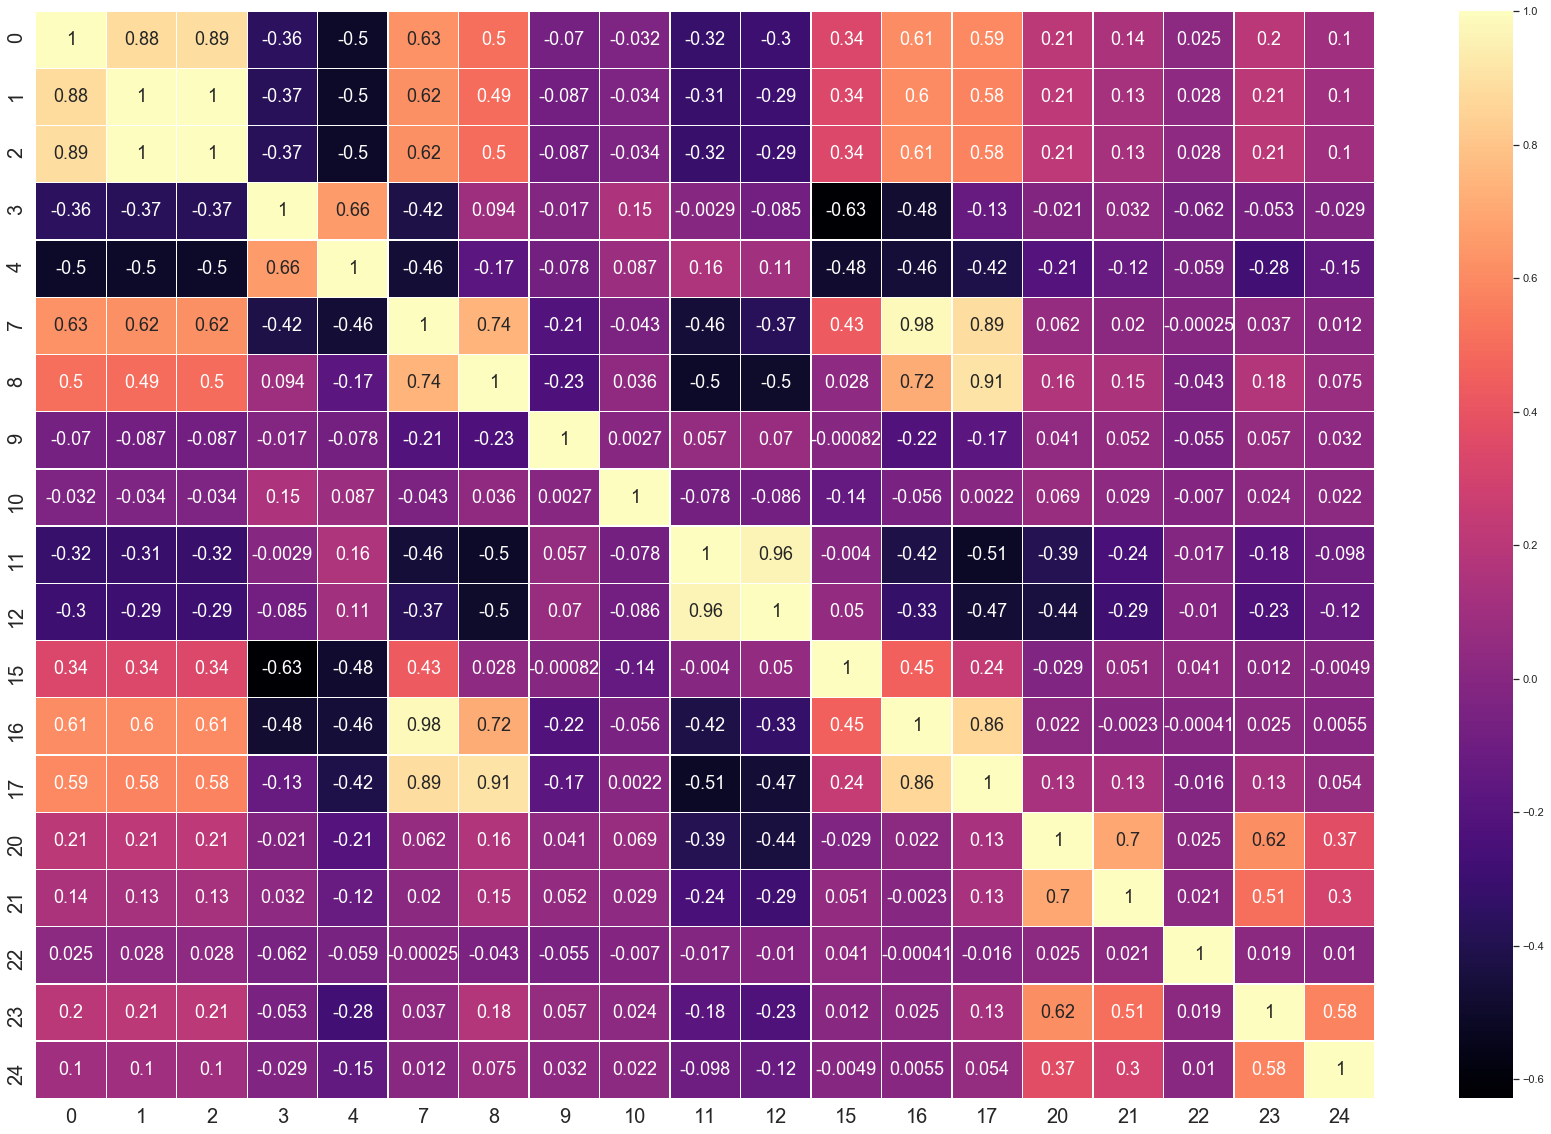

In [10]:
fix,ax = plt.subplots(figsize=(30,20))
sns.heatmap(features.corr(), annot=True, lw=0.3, 
            cmap='magma', annot_kws={"size": 18})
ax.tick_params(labelsize=20)

### Seaborn pairplot
Another tool for identifying possible correlations. We decided to leave it out because of too much running time.

In [11]:
# sns.pairplot(features)

# Missing values
Before diving into the pre-processing phase, let's find out how many null values we have in the data

In [12]:
# Calculate proportion of null values of each feature
pd.options.display.float_format = '{:.5}%'.format
(features.isna().sum()/len(features))*100

0         0.0%
1         0.0%
2         0.0%
3     0.26623%
4     0.46929%
5      6.0873%
6         0.0%
7    0.031587%
8    0.081224%
9         0.0%
10        0.0%
11    0.47832%
12     0.5099%
13        0.0%
14        0.0%
15     8.4428%
16    0.12635%
17    0.23465%
18    0.94761%
19     4.6027%
20     6.0692%
21    0.44673%
22        0.0%
23    0.45124%
24    0.45124%
dtype: float64

In [13]:
# readjust float display 
pd.options.display.float_format = '{:.5}'.format

Now, check how many null values in each sample

In [14]:
features.isna().sum()

0        0
1        0
2        0
3       59
4      104
5     1349
6        0
7        7
8       18
9        0
10       0
11     106
12     113
13       0
14       0
15    1871
16      28
17      52
18     210
19    1020
20    1345
21      99
22       0
23     100
24     100
dtype: int64

And calculating how many records have X missing values

In [15]:
features.apply(lambda x: 25-x.count(), axis=1).value_counts()

0     18137
1      2338
2      1391
3       149
10       40
7        35
4        31
5        24
6        10
12        2
13        1
11        1
9         1
8         1
dtype: int64

# Duplicated records
Following the analysis below, no duplicated records were found.

In [16]:
features[features.duplicated()]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Index: []

[0 rows x 25 columns]

# 2. Preprocessing

## 2.1 Missing Values

Now, we will handle missing values in each feature. Note that even though there are no missing values in several features, we still going to handle these scenarios in order to prepare this algorithm to different training sets in the future. 
It is important to note that each policy will be implemented for both training set and test set. 

### functions that will be used during the missing values process

In [13]:
def replace_with_mean(feature):
    return feature.fillna(feature.mean())

def replace_with_median(feature):
    return feature.fillna(feature.median())

def replace_based_on_last_seen(feature):
    return feature.fillna( method ='ffill') 

def replace_based_on_probabilities(feature):
      result = np.random.choice(feature.value_counts().index, 
                                feature.isna().sum(),
                                list((feature.value_counts()/feature.value_counts().sum()).values))
      return pd.Series(result)

### Feature 0
- Data Type: Quantitative
- Format Type: integer
- Missing Values at the Moment: 0

Replace missing values with mean

In [18]:
train['0'].describe()

count   2.2161e+04
mean         2.186
std        0.81508
min       -0.49061
25%         1.6221
50%         2.1677
75%         2.7203
max          9.092
Name: 0, dtype: float64

In [19]:
train['0'] = replace_with_mean(train['0'])
test['0'] = replace_with_mean(test['0'])

### Feature 1
- Data Type: Quantitative
- Format Type: float
- Missing Values(Training Set): 0

Replace missing values with mean

In [20]:
train['1'].describe()

count   2.2161e+04
mean        19.798
std         10.764
min         2.4373
25%         12.268
50%         17.833
75%         25.196
max         248.88
Name: 1, dtype: float64

In [21]:
train['1'] = replace_with_mean(train['1'])
test['1'] = replace_with_mean(test['1'])

### Feature 2
- Data Type: Quantitative
- Format Type: float
- Missing Values(Training Set): 0

Replace missing values with median

In [22]:
train['2'].describe()

count   2.2161e+04
mean        4.9296
std         3.5726
min            0.0
25%            2.4
50%            4.2
75%            6.6
max           81.2
Name: 2, dtype: float64

In [23]:
train['2'] = replace_with_median(train['2'])
test['2'] = replace_with_median(test['2'])

### Feature 3
- Data Type: Quantitative
- Format Type: float
- Missing Values (Training Set): 59

Replace missing values with mean

In [24]:
train['3'].describe()

count   2.2102e+04
mean        51.547
std         20.184
min            1.0
25%           37.0
50%           52.0
75%           65.0
max          100.0
Name: 3, dtype: float64

In [25]:
train['3'] = replace_with_mean(train['3'])
test['3'] = replace_with_mean(test['3'])

### Feature 4
- Data Type: Quantitative
- Format Type: float
- Missing Values (Training Set): 104

Replace missing values with median

In [26]:
train['4'].describe()

count   2.2057e+04
mean        68.498
std         18.231
min            3.0
25%           57.0
50%           69.0
75%           82.0
max          100.0
Name: 4, dtype: float64

In [27]:
train['4'] = replace_with_median(train['4'])
test['4'] = replace_with_median(test['4'])

### Feature 5
- Data Type: Categorical
- Format Type: object
- Missing Values (Training Set): 1349

replace missing values based on probabilities

In [15]:
train['5'].value_counts(dropna = False)

D    1701
F    1651
E    1633
I    1572
K    1550
P    1542
B    1507
L    1421
C    1413
O    1333
M    1333
A    1178
N    1177
H    1093
G    1039
J    1018
Name: 5, dtype: int64

In [14]:
new_values = replace_based_on_probabilities(train['5']).copy()
train['5'][train['5'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
new_values = replace_based_on_probabilities(test['5']).copy()
test['5'][test['5'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


One Hot Encoding since we have a categorical feature 

In [16]:
feature_5_encoded = pd.get_dummies(train['5'])
feature_5_encoded.head()

A  B  C  D  E  F  G  H  I  J  K  L  M  N  O  P
0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
3  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
4  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0

In [17]:
feature_5_encoded.columns = [str(col) + '_5' for col in feature_5_encoded.columns]

In [18]:
train = pd.concat([train, feature_5_encoded], axis=1)
train.drop('5', axis=1, inplace=True)

In [19]:
train.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       'label', 'A_5', 'B_5', 'C_5', 'D_5', 'E_5', 'F_5', 'G_5', 'H_5', 'I_5',
       'J_5', 'K_5', 'L_5', 'M_5', 'N_5', 'O_5', 'P_5'],
      dtype='object')

In [20]:
feature_5_test_encoded = pd.get_dummies(test['5'])
feature_5_test_encoded.columns = [str(col) + '_5' for col in feature_5_test_encoded.columns]
test = pd.concat([test, feature_5_test_encoded], axis=1)
test.drop('5', axis=1, inplace=True)

### Feature 6
- Data Type: categorical
- Format Type: object
- Missing Values (Training Set): 0

replace missing values  based on last seen value

In [22]:
train['6'].value_counts()

a6     786
a7     785
a18    780
a29    779
a28    779
a15    778
a22    773
a12    771
a25    770
a3     769
a0     768
a1     768
a11    767
a17    766
a5     764
a30    762
a19    762
a27    762
a26    756
a20    755
a14    753
a16    753
a23    750
a2     719
a24    691
a9     684
a13    661
a21    550
a8     503
a4     417
a10    280
Name: 6, dtype: int64

In [23]:
train['6'].fillna(method='ffill', inplace=True)
test['6'].fillna(method='ffill', inplace=True)

This features seems to represent a level of variable. Therefore, let's convert it into float format.

In [24]:
train['6'] = train['6'].str[1:].astype(float)
test['6'] = test['6'].str[1:].astype(float)

In [39]:
train['6'].describe()

count   2.2161e+04
mean         15.32
std         9.0388
min            0.0
25%            7.0
50%           16.0
75%           23.0
max           30.0
Name: 6, dtype: float64

### Feature 7
- Data Type: float
- Format Type: float
- Missing Values (Training Set): 7

In [40]:
train['7'].describe()

count   2.2154e+04
mean        1.6485
std        0.48028
min           0.45
25%         1.2714
50%         1.6071
75%         2.0071
max         3.4357
Name: 7, dtype: float64

replace missing values based on mean

In [41]:
train['7'] = replace_with_mean(train['7'])
test['7'] = replace_with_mean(test['7'])

### Feature 8
- Data Type: float
- Format Type: float
- Missing Values (Training Set): 18

In [42]:
train['8'].describe()

count   2.2143e+04
mean       0.88804
std        0.46138
min       -0.49286
25%        0.54286
50%        0.86429
75%         1.2429
max         2.1286
Name: 8, dtype: float64

replace missing values based on median

In [43]:
train['8'] = replace_with_mean(train['8'])
test['8'] = replace_with_mean(test['8'])

### Feature 9
- Data Type: quantitative (Discrete)
- Format Type: int
- Missing Values (Training Set): 0

In [44]:
train['9'].describe()

count   2.2161e+04
mean        6.4294
std         3.3815
min            1.0
25%            3.0
50%            7.0
75%            9.0
max           12.0
Name: 9, dtype: float64

In [45]:
# distribution of each value
train['9'].value_counts()

5     2016
8     1992
7     1987
6     1974
3     1966
1     1963
9     1949
10    1943
11    1932
2     1828
12    1316
4     1295
Name: 9, dtype: int64

replace missing values based on probabilities

In [46]:
new_values = replace_based_on_probabilities(train['9']).copy()
train['9'][train['9'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
new_values = replace_based_on_probabilities(test['9']).copy()
test['9'][test['9'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Feature 10
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 0

In [48]:
train['10'].describe()

count   2.2161e+04
mean       0.22828
std        0.16156
min       -0.19566
25%          0.136
50%        0.20646
75%        0.27893
max        0.95408
Name: 10, dtype: float64

replace missing values based on median

In [49]:
train['10'] = replace_with_median(train['10'])
test['10'] = replace_with_median(test['10'])

### Feature 11
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 106

In [50]:
train['11'].describe()

count   2.2055e+04
mean        1015.3
std         7.0119
min          984.5
25%         1010.6
50%         1015.3
75%         1020.0
max         1038.9
Name: 11, dtype: float64

replace missing values based on mean

In [51]:
train['11'] = replace_with_mean(train['11'])
test['11'] = replace_with_mean(test['11'])

### Feature 12
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 113

In [52]:
train['12'].describe()

count   2.2048e+04
mean        1017.7
std         7.0858
min          983.7
25%         1013.0
50%         1017.7
75%         1022.4
max         1040.9
Name: 12, dtype: float64

replace missing values based on mean

In [53]:
train['12'] = replace_with_mean(train['12'])
test['12'] = replace_with_mean(test['12'])

### Feature 13
- Data Type: Binary
- Format Type: int
- Missing Values (Training Set): 0

In [54]:
train['13'].value_counts(dropna = False)

0          16906
1           5174
unknown       81
Name: 13, dtype: int64

First, let's handle 'unknown' values.
Each 'unknown' values will be replaced with 0 or 1, based on value probability in the data set. Therefore, we will convert 'unknown' values into NaN and then call 'replace_based_on_probabilities' method.

In [55]:
a = train['13'].replace('unknown', np.nan).copy()
new_values = replace_based_on_probabilities(a)
a[a.isnull()] = new_values.values

In [56]:
train['13'].replace('unknown', np.nan, inplace=True)
test['13'].replace('unknown', np.nan, inplace=True)

In [57]:
new_values = replace_based_on_probabilities(train['13']).copy()
train['13'][train['13'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
new_values = replace_based_on_probabilities(test['13']).copy()
test['13'][test['13'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Feature 14
- Data Type: quantitative 
- Format Type: object
- Missing Values (Training Set): 0

In [59]:
train['14'].describe()

count     22161
unique      315
top       0.0mm
freq      13816
Name: 14, dtype: object

Adjust format and convert it into float

In [60]:
train['14'].isnull().sum()

0

In [61]:
train['14'] = train['14'].str[:-2].astype(float)
test['14'] = test['14'].str[:-2].astype(float)

and now if we check for nulls, we will discover null records that used to be named 'nnmam'

In [62]:
train['14'].isnull().sum()

81

In [63]:
# Show new details
train['14'].describe()

count   2.208e+04
mean       2.2899
std        7.1454
min           0.0
25%           0.0
50%           0.0
75%           0.8
max         183.0
Name: 14, dtype: float64

Note that many of the records are with value 0. therefore, we will replace null with the median value, which is 0 in this case.

In [64]:
train['14'].value_counts()

0.0      13816
0.2       1364
0.4        651
0.6        441
0.8        360
         ...  
58.8         1
121.4        1
53.6         1
55.0         1
44.8         1
Name: 14, Length: 314, dtype: int64

In [65]:
train['14'].median(), test['14'].median()

(0.0, 0.0)

In [66]:
train['14'] = replace_with_median(train['14'])
test['14'] = replace_with_median(test['14'])

### Feature 15
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 1871

Due to its large number of missing values, we will go back to feature 15 in the end of this phase

### Feature 16
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 28

replace missing values based on mean

In [67]:
train['16'].describe()

count   2.2133e+04
mean        21.617
std         6.6027
min            3.9
25%           16.5
50%           21.0
75%           26.4
max           46.1
Name: 16, dtype: float64

In [68]:
train['16'] = replace_with_mean(train['16'])
test['16'] = replace_with_mean(test['16'])

### Feature 17
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 52

replace missing values based on mean

In [69]:
train['17'].describe()

count   2.2109e+04
mean        17.066
std         6.4092
min           -0.7
25%           12.1
50%           16.6
75%           21.8
max           36.9
Name: 17, dtype: float64

In [70]:
train['17'] = replace_with_mean(train['17'])
test['17'] = replace_with_mean(test['17'])

### Feature 18
- Data Type: Categorical 
- Format Type: object
- Missing Values (Training Set): 210

In [71]:
train['18'].value_counts(dropna = False)

D      1659
P      1634
L      1626
K      1599
F      1517
I      1502
M      1444
B      1416
E      1399
C      1319
O      1266
A      1244
N      1206
H      1114
J      1068
G       938
NaN     210
Name: 18, dtype: int64

replace missing values based on probabilties

In [72]:
new_values = replace_based_on_probabilities(train['18']).copy()
train['18'][train['18'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
new_values = replace_based_on_probabilities(test['18']).copy()
test['18'][test['18'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
train['18'].value_counts(dropna = False)

D    1673
P    1643
L    1635
K    1616
F    1537
I    1513
M    1457
B    1432
E    1405
C    1333
O    1278
A    1259
N    1216
H    1130
J    1082
G     952
Name: 18, dtype: int64

One Hot Encoding since we have a categorical feature

In [75]:
feature_18_encoded = pd.get_dummies(train['18'])
feature_18_encoded.head()

A  B  C  D  E  F  G  H  I  J  K  L  M  N  O  P
0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
2  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
3  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
4  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0

since we already have columns with 'A,B,C,...' (were created from feature 5), we will rename the new columns into 'A_18, B_18,...'

In [76]:
feature_18_encoded.columns = [str(col) + '_18' for col in feature_18_encoded.columns]

In [77]:
train = pd.concat([train, feature_18_encoded], axis=1)
train.drop('18', axis=1, inplace=True)

In [78]:
train.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '19', '20', '21', '22', '23', '24', 'label',
       'A_5', 'B_5', 'C_5', 'D_5', 'E_5', 'F_5', 'G_5', 'H_5', 'I_5', 'J_5',
       'K_5', 'L_5', 'M_5', 'N_5', 'O_5', 'P_5', 'A_18', 'B_18', 'C_18',
       'D_18', 'E_18', 'F_18', 'G_18', 'H_18', 'I_18', 'J_18', 'K_18', 'L_18',
       'M_18', 'N_18', 'O_18', 'P_18'],
      dtype='object')

In [79]:
# For test set:
feature_18_test_encoded = pd.get_dummies(test['18'])
feature_18_test_encoded.columns = [str(col) + '_18' for col in feature_18_test_encoded.columns]
test = pd.concat([test, feature_18_test_encoded], axis=1)
test.drop('18', axis=1, inplace=True)

### Feature 19
- Data Type: Categorical 
- Format Type: object
- Missing Values (Training Set): 1020

In [80]:
train['19']

0          D
1          I
2        NaN
3          D
4        NaN
        ... 
22156      I
22157      I
22158      G
22159      J
22160      A
Name: 19, Length: 22161, dtype: object

In [81]:
train['19'].value_counts(dropna = False)

E      1861
F      1559
I      1405
O      1396
C      1385
P      1373
D      1343
L      1303
A      1276
G      1272
M      1235
J      1216
K      1174
N      1139
B      1108
H      1096
NaN    1020
Name: 19, dtype: int64

replace missing values based on probabilties

In [82]:
new_values = replace_based_on_probabilities(train['19']).copy()
train['19'][train['19'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
new_values = replace_based_on_probabilities(test['19']).copy()
test['19'][test['19'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
train['19'].value_counts(dropna = False)

E    1933
F    1639
I    1464
C    1446
O    1443
P    1436
D    1413
L    1357
A    1346
G    1336
M    1297
J    1289
K    1228
N    1202
H    1169
B    1163
Name: 19, dtype: int64

One Hot Encoding since we have a categorical feature

In [85]:
feature_19_encoded = pd.get_dummies(train['19'])
feature_19_encoded.head()

A  B  C  D  E  F  G  H  I  J  K  L  M  N  O  P
0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
4  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0

In [86]:
feature_19_encoded.columns = [str(col) + '_19' for col in feature_19_encoded.columns]

In [87]:
train = pd.concat([train, feature_19_encoded], axis=1)
train.drop('19', axis=1, inplace=True)

In [88]:
train.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '20', '21', '22', '23', '24', 'label', 'A_5',
       'B_5', 'C_5', 'D_5', 'E_5', 'F_5', 'G_5', 'H_5', 'I_5', 'J_5', 'K_5',
       'L_5', 'M_5', 'N_5', 'O_5', 'P_5', 'A_18', 'B_18', 'C_18', 'D_18',
       'E_18', 'F_18', 'G_18', 'H_18', 'I_18', 'J_18', 'K_18', 'L_18', 'M_18',
       'N_18', 'O_18', 'P_18', 'A_19', 'B_19', 'C_19', 'D_19', 'E_19', 'F_19',
       'G_19', 'H_19', 'I_19', 'J_19', 'K_19', 'L_19', 'M_19', 'N_19', 'O_19',
       'P_19'],
      dtype='object')

In [89]:
feature_19_test_encoded = pd.get_dummies(test['19'])
feature_19_test_encoded.columns = [str(col) + '_19' for col in feature_19_test_encoded.columns]
test = pd.concat([test, feature_19_test_encoded], axis=1)
test.drop('19', axis=1, inplace=True)

### Feature 20
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 1345

In [90]:
train['20'].describe()

count   2.0816e+04
mean        39.995
std         13.151
min           11.0
25%           31.0
50%           39.0
75%           48.0
max          135.0
Name: 20, dtype: float64

replace missing values based on mean

In [91]:
train['20'] = replace_with_mean(train['20'])
test['20'] = replace_with_mean(test['20'])

### Feature 21
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 99

replace missing values based on median

In [92]:
train['21'].describe()

count   2.2062e+04
mean        19.102
std         8.5469
min            0.0
25%           13.0
50%           19.0
75%           24.0
max           69.0
Name: 21, dtype: float64

In [93]:
train['21'] = replace_with_median(train['21'])
test['21'] = replace_with_median(test['21'])

### Feature 22
- Data Type: numeric (years)
- Format Type: int
- Missing Values (Training Set): 0

In [94]:
train['22'].describe()

count   2.2161e+04
mean        2010.9
std        0.82374
min         2010.0
25%         2010.0
50%         2011.0
75%         2012.0
max         2012.0
Name: 22, dtype: float64

replace missing values based on probabilties

In [95]:
new_values = replace_based_on_probabilities(train['22']).copy()
train['22'][train['22'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
new_values = replace_based_on_probabilities(test['22']).copy()
test['22'][test['22'].isnull()] = new_values.values

C:\Users\Eyal Danieli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Feature 23
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 100

In [97]:
train['23'].describe()

count   2.2061e+04
mean        146.97
std          86.61
min            0.0
25%           90.0
50%          130.0
75%          200.0
max          670.0
Name: 23, dtype: float64

replace missing values based on median

In [98]:
train['23'] = replace_with_median(train['23'])
test['23'] = replace_with_median(test['23'])

### Feature 24
- Data Type: quantitative 
- Format Type: float
- Missing Values (Training Set): 100

In [99]:
train['24'].describe()

count   2.2061e+04
mean        224.84
std          160.8
min      0.0013554
25%         100.14
50%         199.87
75%         316.12
max         1426.5
Name: 24, dtype: float64

replace missing values based on median

In [100]:
train['24'] = replace_with_median(train['24'])
test['24'] = replace_with_median(test['24'])

# Feature 15

Feature 15 has about 1,871 missing values. Based on it's visual analysis above, feature 15 can explain quite well differences between label 0 and label 1 in the training set.

We have chosen to fill the missing values with the last seen value 

In [101]:
train['15'].fillna(method='ffill', inplace=True)
test['15'].fillna(method='ffill', inplace=True)

now let's check again the distirubtion of feature 15, based on each label

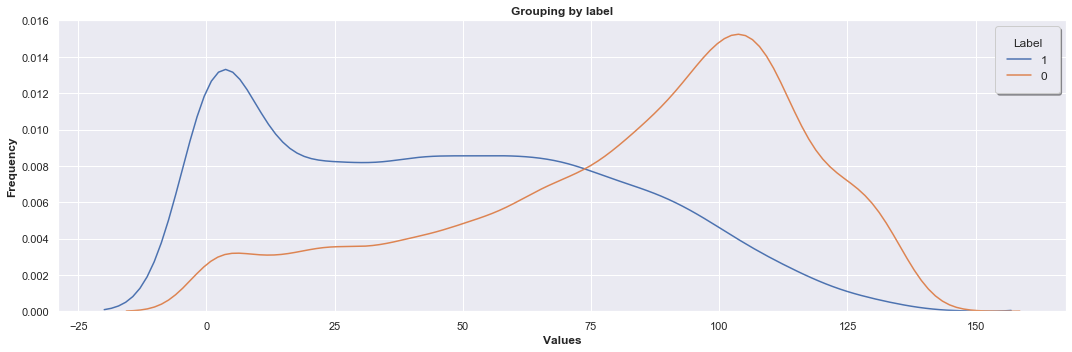

In [102]:
fig,ax = plt.subplots(figsize=(15,5))
c = sns.kdeplot(train['15'][labels[labels==1].index])
b = sns.kdeplot(train['15'][labels[labels==0].index])
plt.legend(['1', '0'], loc='upper right', fancybox=True, framealpha=1, 
           shadow=True, borderpad=1, title='Label', fontsize='large')
plt.title('Grouping by label', weight='bold')
plt.xlabel('Values', weight='bold')
plt.ylabel('Frequency', weight='bold')
fig.tight_layout()

OK, it seems quite similar to the plot in part 1. let's keep it on and perhaps we will change it according to our model performance in the future.

# 2.2 Ourliers Removal
We will check two known methods for outliers removal: IQR and z-score.

In [27]:
def calculate_IQR(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    result= feature[(feature<(Q1-1.5*IQR)) | (feature>(Q3+1.5*IQR))]
    if len(result) == 0:
        print ("Feature: %s. No possible outliers detected using IQR" % feature.name)
        return None
    else:
        print("Feature: %s. %s possible outliers detected using IQR" % (feature.name, len(result)))
        return result
    
def calculate_z_score(feature):
    z_score = feature[(np.abs(stats.zscore(feature))>3)]
    if len(z_score) == 0:
        print ("Feature: %s. No possible outliers detected using z-score" % feature.name)
        return z_score
    else:
        print("Feature: %s. %s possible outliers detected using z-score" % (feature.name, len(z_score)))
        return z_score
    
# box_plot will be used for analyzing the outliers    
def creat_box_plot(feature):
        plt.figure(figsize=(10, 5))
        plt.title('Box Plot of Feature %s' %feature.name)
        sns.boxplot(feature)

In [104]:
ab = train.copy()

We tried both IQR and z-score but eventully we decided to choose z-score

In [105]:
# for feature in train.columns:
#     if (train[feature].dtype == 'float' or train[feature].dtype=='int64') and feature!='label':
#         print('------------------------------------------------')
#         outliers = calculate_IQR(train[feature])
#         if len(outliers)>400:
#             print('That means, we should make a further analysis before removing these possible outliers')
#         else:
#             print('Removing outliers...')
#             train.drop(outliers.index, inplace=True)

In [106]:
for feature in train.columns:
    if (train[feature].dtype == 'float' or train[feature].dtype=='int64') and feature!='label':
        print('------------------------------------------------')
        outliers = calculate_z_score(train[feature])
        if len(outliers)>400:
            print('That means, we should make a further analysis before removing these possible outliers')
        else:
            print('Removing outliers...')
            train.drop(outliers.index, inplace=True)

------------------------------------------------
Feature: 0. 94 possible outliers detected using z-score
Removing outliers...
------------------------------------------------
Feature: 1. 254 possible outliers detected using z-score
Removing outliers...
------------------------------------------------
Feature: 2. 96 possible outliers detected using z-score
Removing outliers...
------------------------------------------------
Feature: 3. No possible outliers detected using z-score
Removing outliers...
------------------------------------------------
Feature: 4. 91 possible outliers detected using z-score
Removing outliers...
------------------------------------------------
Feature: 6. No possible outliers detected using z-score
Removing outliers...
------------------------------------------------
Feature: 7. 9 possible outliers detected using z-score
Removing outliers...
------------------------------------------------
Feature: 8. No possible outliers detected using z-score
Removing outl

## Feature 10

In [107]:
train['10'].describe()

count   2.0893e+04
mean        0.2276
std        0.16052
min       -0.19566
25%        0.13589
50%        0.20642
75%        0.27869
max        0.95408
Name: 10, dtype: float64

In [108]:
z_10 = calculate_z_score(train['10'])

Feature: 10. 928 possible outliers detected using z-score


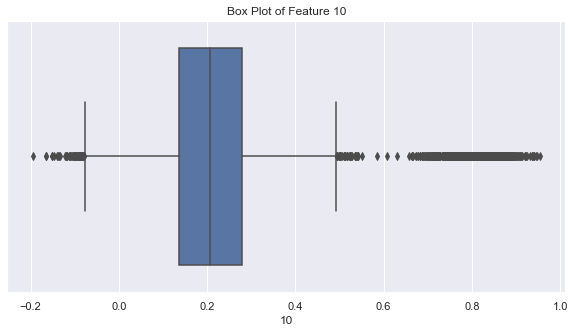

In [109]:
#Box plot
creat_box_plot(train['10'])

In [110]:
z_10.describe()

count      928.0
mean     0.80679
std     0.046917
min      0.70992
25%      0.77057
50%      0.80327
75%      0.84001
max      0.95408
Name: 10, dtype: float64

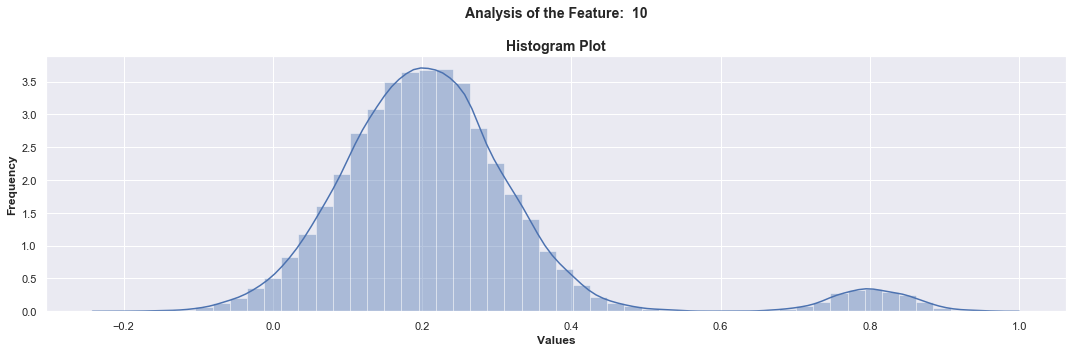

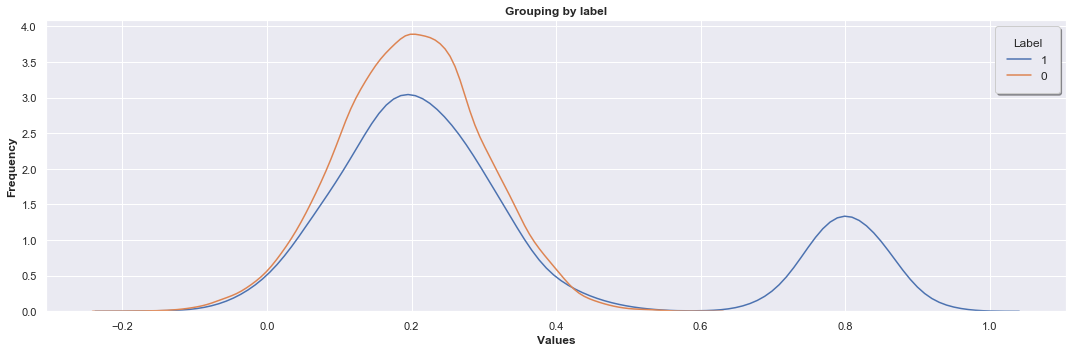

In [111]:
feature_analysis(train['10'], labels=train['label'])

Based on the visual analysis and the results above, we believe that these possible outlier points are not a real outliers. We can notice that these points belong to the same group with mean of about 0.8 and a quite small standard deviation of about 0.04. 
### Therefore, we will keep these points in our data

## Feature 14

In [112]:
train['14'].describe()

count   2.0893e+04
mean        2.2654
std         7.0865
min            0.0
25%            0.0
50%            0.0
75%            0.8
max          183.0
Name: 14, dtype: float64

In [113]:
z_14 = calculate_z_score(train['14'])

Feature: 14. 449 possible outliers detected using z-score


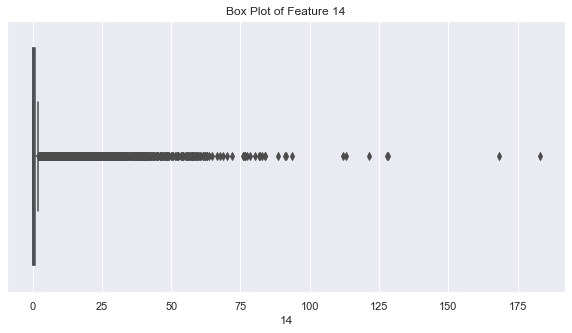

In [114]:
creat_box_plot(train['14'])

In [115]:
z_14.describe()

count    449.0
mean    39.353
std     18.617
min       23.6
25%       27.6
50%       34.2
75%       43.8
max      183.0
Name: 14, dtype: float64

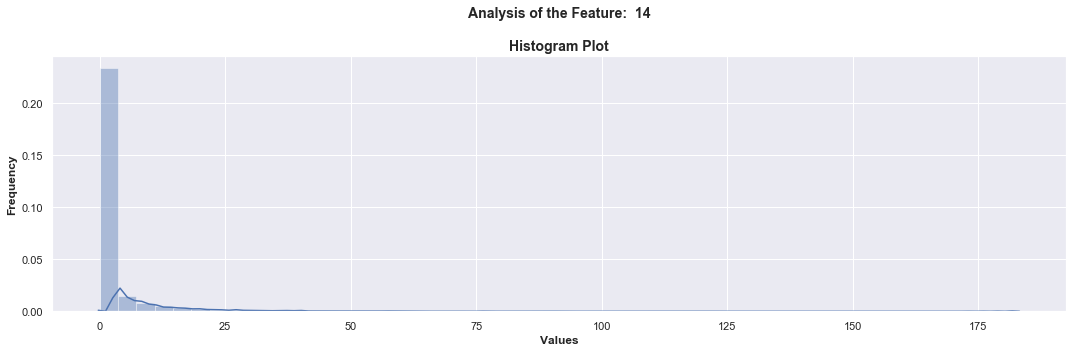

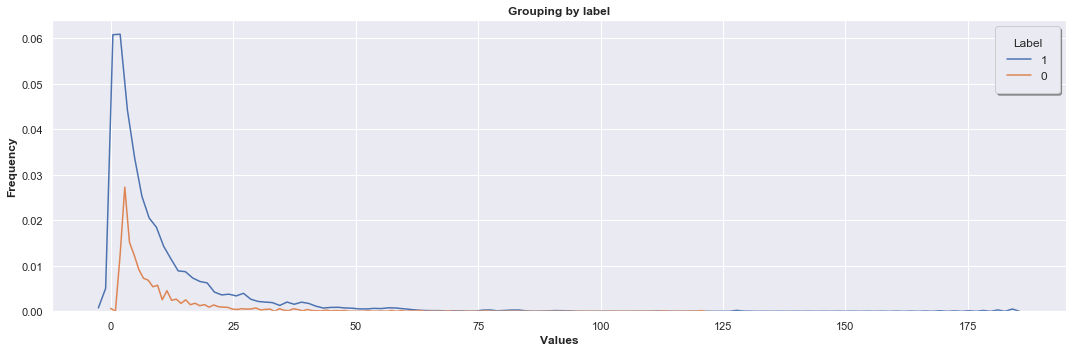

In [116]:
feature_analysis(train['14'], labels=train['label'])

Following the analysis above, we can see that all outliers in feature 14 are greater then 23.6 while the mean value of feature 14 is 2.2. However, since there are more than 400 samples that could be outliers, we decided to remove only samples with values greater then 75.

In [117]:
z_14[z_14>75].count()

23

In [118]:
train.drop(z_14[z_14>75].index, inplace=True)

In [119]:
# Reset index
train.reset_index(inplace=True)
train.drop('index', axis=1, inplace=True)

# 2.3 Create new features
We created 3 new features based on other features

In [120]:
train.describe()

0         1         2         3         4         6         7  \
count 2.087e+04 2.087e+04 2.087e+04 2.087e+04 2.087e+04 2.087e+04 2.087e+04   
mean     2.1335    18.842    4.6111    52.162    69.411     15.23     1.634   
std     0.75321    8.5749     2.837    19.653    17.363    9.0317   0.46453   
min    -0.22797    2.4373       0.0       2.0      16.0       0.0      0.45   
25%      1.6051    12.043       2.4      38.0      58.0       7.0    1.2643   
50%      2.1377    17.524       4.1      52.0      70.0      16.0       1.6   
75%      2.6703    24.448       6.4      65.0      82.0      23.0    1.9857   
max      4.5586    47.146      13.4     100.0     100.0      30.0    3.0286   

              8         9        10  ...      G_19      H_19      I_19  \
count 2.087e+04 2.087e+04 2.087e+04  ... 2.087e+04 2.087e+04 2.087e+04   
mean    0.87697    6.4413   0.22753  ...  0.058984  0.052036  0.066555   
std     0.45998    3.3442   0.16038  ...    0.2356   0.22211   0.24926   
min    -0.49286       1.0  -0.19566  ...       0.0       0.0       0.0   
25%     0.53571       3.0   0.13589  ...       0.0       0.0       0.0   
50%        0.85       6.0    0.2064  ...       0.0       0.0       0.0   
75%      1.2286       9.0   0.27868  ...       0.0       0.0       0.0   
max        2.05      12.0   0.95408  ...       1.0       1.0       1.0   

           J_19      K_19      L_19      M_19      N_19      O_19      P_19  
count 2.087e+04 2.087e+04 2.087e+04 2.087e+04 2.087e+04 2.087e+04 2.087e+04  
mean   0.058553  0.055966  0.062003  0.060278   0.05357  0.066315  0.065549  
std     0.23479   0.22986   0.24117   0.23801   0.22517   0.24884    0.2475  
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
max         1.0       1.0       1.0       1.0       1.0       1.0       1.0  

[8 rows x 70 columns]

In [121]:
train['new_1'] = (train['0']+train['8']+train['10'])*train['21']
train['new_2'] = (train['14']*train['9'])+train['23']
train['new_3'] = (train['17']*train['11'])/100

And for test set

In [122]:
test['new_1'] = (test['0']+test['8']+test['10'])*test['21']
test['new_2'] = (test['14']*test['9'])+test['23']
test['new_3'] = (test['17']*test['11'])/100

# 2.4 Normalization

We have to normalize the data in order to make model training less sensitive to the scale of features

### let's split numerical continuous variables and categorical variables

Convert label columns type into np.unit8

In [123]:
train['label'] = train['label'].astype(np.uint8)

In [124]:
train_numerical = train.select_dtypes(['float', 'int64'])
train_numerical.head()

0      1   2    3     4    6      7       8   9      10  ...   16  \
0   1.171 5.6721 0.6 80.0  76.0 21.0 1.1071 0.69286   5 0.70296  ... 13.9   
1  2.5958 23.203 6.4 43.0  64.0  9.0    1.7 0.61429  11 0.22391  ... 18.6   
2 0.97279 7.1273 0.4 63.0 100.0  4.0 1.2429 0.42857   6 0.18085  ... 16.5   
3  1.8917 17.882 4.2 65.0  71.0 15.0   1.05 0.67143  10 0.18129  ... 14.2   
4  1.9659 13.937 3.2 40.0  62.0  1.0   1.95  1.0857   3 0.23735  ... 26.6   

    17   20   21    22    23     24  new_1  new_2  new_3  
0 12.2 28.0  7.0  2011  40.0 15.421 17.968   43.0 124.94  
1 16.5 61.0 43.0  2012 110.0  240.5 147.66  110.0 165.87  
2  9.6 15.0  7.0  2012   0.0 224.28 11.075    0.0 97.997  
3 11.4 39.0 24.0  2010 130.0 86.811 65.865  138.0  116.5  
4 23.4 30.0 20.0  2011   0.0 120.64 65.779    0.0 235.24  

[5 rows x 24 columns]

In [125]:
train_binary = train.select_dtypes(exclude=['float', 'int64'])
train_binary.head()

13  label  A_5  B_5  C_5  D_5  E_5  F_5  G_5  H_5  ...  G_19  H_19  I_19  \
0  0      1    0    0    0    1    0    0    0    0  ...     0     0     0   
1  0      0    0    0    0    0    0    0    0    0  ...     0     0     1   
2  0      0    0    0    1    0    0    0    0    0  ...     0     0     0   
3  0      0    0    0    0    0    0    0    0    0  ...     0     0     0   
4  0      0    0    0    0    0    0    1    0    0  ...     0     1     0   

   J_19  K_19  L_19  M_19  N_19  O_19  P_19  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     0     1     0     0  
3     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0  

[5 rows x 50 columns]

In [126]:
test_numerical = test.select_dtypes(['float', 'int64'])
test_binary = test.select_dtypes(exclude=['float', 'int64'])

## Standardization

In [127]:
scaler_train = preprocessing.StandardScaler().fit(train_numerical)
scaled_train = pd.DataFrame(scaler_train.transform(train_numerical))

In [128]:
scaled_train.head()

0        1       2        3        4         5        6        7   \
0   -1.278  -1.5359 -1.4139   1.4165  0.37952   0.63888  -1.1342 -0.40027   
1   0.6137   0.5086  0.6306 -0.46619 -0.31163  -0.68981  0.14209 -0.57109   
2  -1.5411  -1.3662 -1.4844  0.55147   1.7618   -1.2434 -0.84203 -0.97484   
3 -0.32114 -0.11204 -0.1449  0.65324 0.091541 -0.025466  -1.2572 -0.44686   
4 -0.22261 -0.57206 -0.4974 -0.61884 -0.42683   -1.5756  0.68028  0.45382   

        8         9   ...       14        15       16      17       18  \
0 -0.43098    2.9644  ...  -1.1821  -0.74255   -0.953 -1.4485 0.073887   
1   1.3632 -0.022565  ... -0.44512 -0.060578   1.9397  3.0448    1.289   
2 -0.13195  -0.29108  ... -0.77439   -1.1549  -2.0925 -1.4485    1.289   
3   1.0642  -0.28833  ...   -1.135  -0.86943 0.011218  0.6733  -1.1413   
4   -1.029  0.061208  ...  0.80925    1.0337 -0.77769 0.17404 0.073887   

        19       20      21       22        23  
0  -1.2792  -1.3876 -1.2226  -1.1923  -0.73049  
1 -0.38462  0.19497  2.3972 -0.47023 -0.084651  
2  -1.7903 0.080964  -1.415  -1.6558   -1.1556  
3 -0.12904 -0.88563 0.11426 -0.16845   -0.8637  
4  -1.7903 -0.64775 0.11185  -1.6558    1.0098  

[5 rows x 24 columns]

In [129]:
scaler_test = preprocessing.StandardScaler().fit(test_numerical)
scaled_test = pd.DataFrame(scaler_test.transform(test_numerical))

# MinMax

Eventually, we decided to perform standardization

In [130]:
# scaler_train = preprocessing.MinMaxScaler().fit(train_numerical)
# scaled_train = pd.DataFrame(scaler_train.transform(train_numerical))

In [131]:
# scaled_train.head()

In [132]:
# scaler_test = preprocessing.MinMaxScaler().fit(test_numerical)
# scaled_test = pd.DataFrame(scaler_test.transform(test_numerical))

# 2.5 Feature Selection

We use feature selection when we want to reduce the number of input variables when developing a ML model. In our case, we decided to use both PCA and correlation analysis.

## PCA

In [133]:
scaled_train.shape

(20870, 24)

In [134]:
pca = PCA() #Initialize PCA
pca.fit(scaled_train) # Fit the model with the data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [135]:
pca.explained_variance_ratio_

array([0.33015176, 0.1426571 , 0.10361565, 0.05164229, 0.04739796,
       0.04465225, 0.04232756, 0.03958351, 0.03855185, 0.03488918,
       0.03449422, 0.0254536 , 0.01962504, 0.01471071, 0.0137026 ,
       0.00584802, 0.00429834, 0.00191669, 0.0014461 , 0.00118751,
       0.00108067, 0.00049066, 0.00027591, 0.00000083])

In [136]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33015176, 0.47280887, 0.57642452, 0.62806681, 0.67546477,
       0.72011702, 0.76244458, 0.80202809, 0.84057994, 0.87546912,
       0.90996334, 0.93541694, 0.95504197, 0.96975268, 0.98345528,
       0.9893033 , 0.99360164, 0.99551833, 0.99696443, 0.99815194,
       0.99923261, 0.99972326, 0.99999917, 1.        ])

Text(0.5, 1.0, 'PCA result')

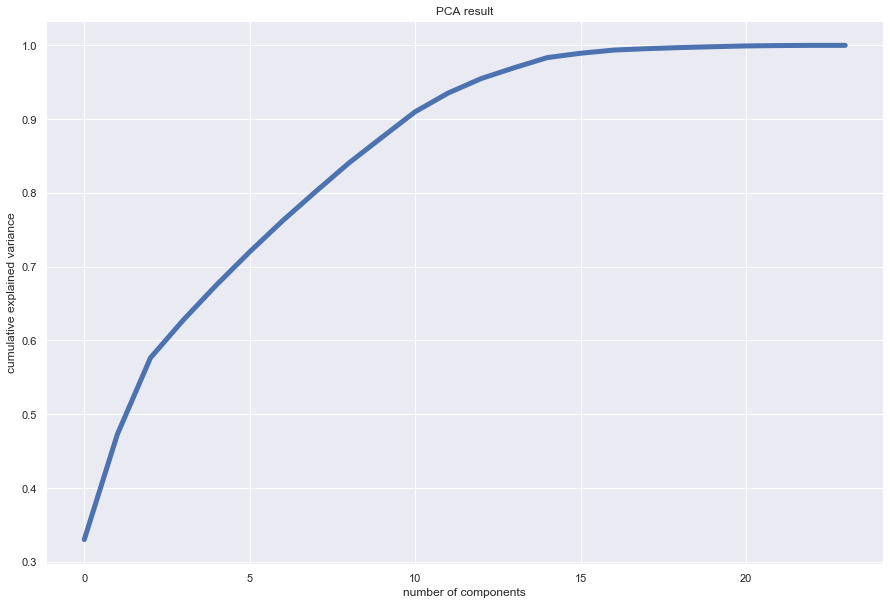

In [137]:
plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=5)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA result')

That means that for 95% of the explained variance can be addressed by about 13 components.

Therefore, let's implement PCA again but with 13 components as limit.

In [138]:
pca = PCA(n_components=13) #Initialize PCA
fitted_model = pca.fit(scaled_train) # Fit the model with the data

In [139]:
pca.explained_variance_ratio_

array([0.33015176, 0.1426571 , 0.10361565, 0.05164229, 0.04739796,
       0.04465225, 0.04232756, 0.03958351, 0.03855185, 0.03488918,
       0.03449422, 0.0254536 , 0.01962504])

In [140]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33015176, 0.47280887, 0.57642452, 0.62806681, 0.67546477,
       0.72011702, 0.76244458, 0.80202809, 0.84057994, 0.87546912,
       0.90996334, 0.93541694, 0.95504197])

In [141]:
new_features_train = pd.DataFrame(fitted_model.transform(scaled_train))

Apply for test set

In [142]:
scaled_test.head()

0        1         2        3        4        5         6         7   \
0 -0.78462 -0.68823  -0.61977  0.75287   1.5669 -0.48551 -0.091072  -0.52115   
1 -0.66421 -0.43562  -0.34993   1.0037  0.50202  0.29389   0.62582   0.95731   
2  0.18794  0.15377   0.13577  0.60238 -0.89917  0.51657   0.46153   0.22586   
3  0.46836  0.18464   0.24371  -1.6049  0.10968  0.29389    1.7012   0.80169   
4 -0.95866 -0.13666 -0.026129 -0.40091  -1.5157  -1.3763  -0.74822 0.0079838   

        8         9   ...        14       15        16       17       18  \
0  -1.0042 -0.097998  ... -0.010936 -0.75714   0.97633   1.6707   1.2867   
1 -0.71017  -0.64318  ...   0.52303   1.1347   -1.2467 -0.95706   1.2867   
2  0.46587   0.22849  ...    0.3247  0.90015 -0.055795   1.4318 0.062006   
3   1.3479  -0.28438  ...    1.8503   1.4005  -0.37337 -0.71817   1.2867   
4  0.75988  0.088805  ...  -0.83477 -0.25682   0.26178  0.11794   1.2867   

        19       20       21       22       23  
0 -0.89744   0.8195  0.38073  -0.8683 -0.74872  
1  -1.2482 -0.64108 -0.79109  -1.1536   1.1418  
2 -0.89744  0.44413   1.2149 -0.87405  0.91957  
3  -1.0144  -1.0371 -0.32262  0.77831   1.3847  
4   0.6225  -0.2798 -0.36091  0.37048 -0.24319  

[5 rows x 24 columns]

In [143]:
new_features_test = pd.DataFrame(fitted_model.transform(scaled_test))

concatinate binary and numeric features into a single dataframe

In [144]:
adjusted_train_x = pd.concat([new_features_train, train_binary.drop('label', axis=1)], axis=1)
adjusted_train_y = train_binary['label']

In [145]:
adjusted_train_x.shape, adjusted_train_y.shape

((20870, 62), (20870,))

In [146]:
adjusted_test_x = pd.concat([new_features_test, test_binary], axis=1)

In [147]:
adjusted_test_x.shape

(7387, 62)

## Correlation 

Now, let's check correlations between our features in the training set.

In [148]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

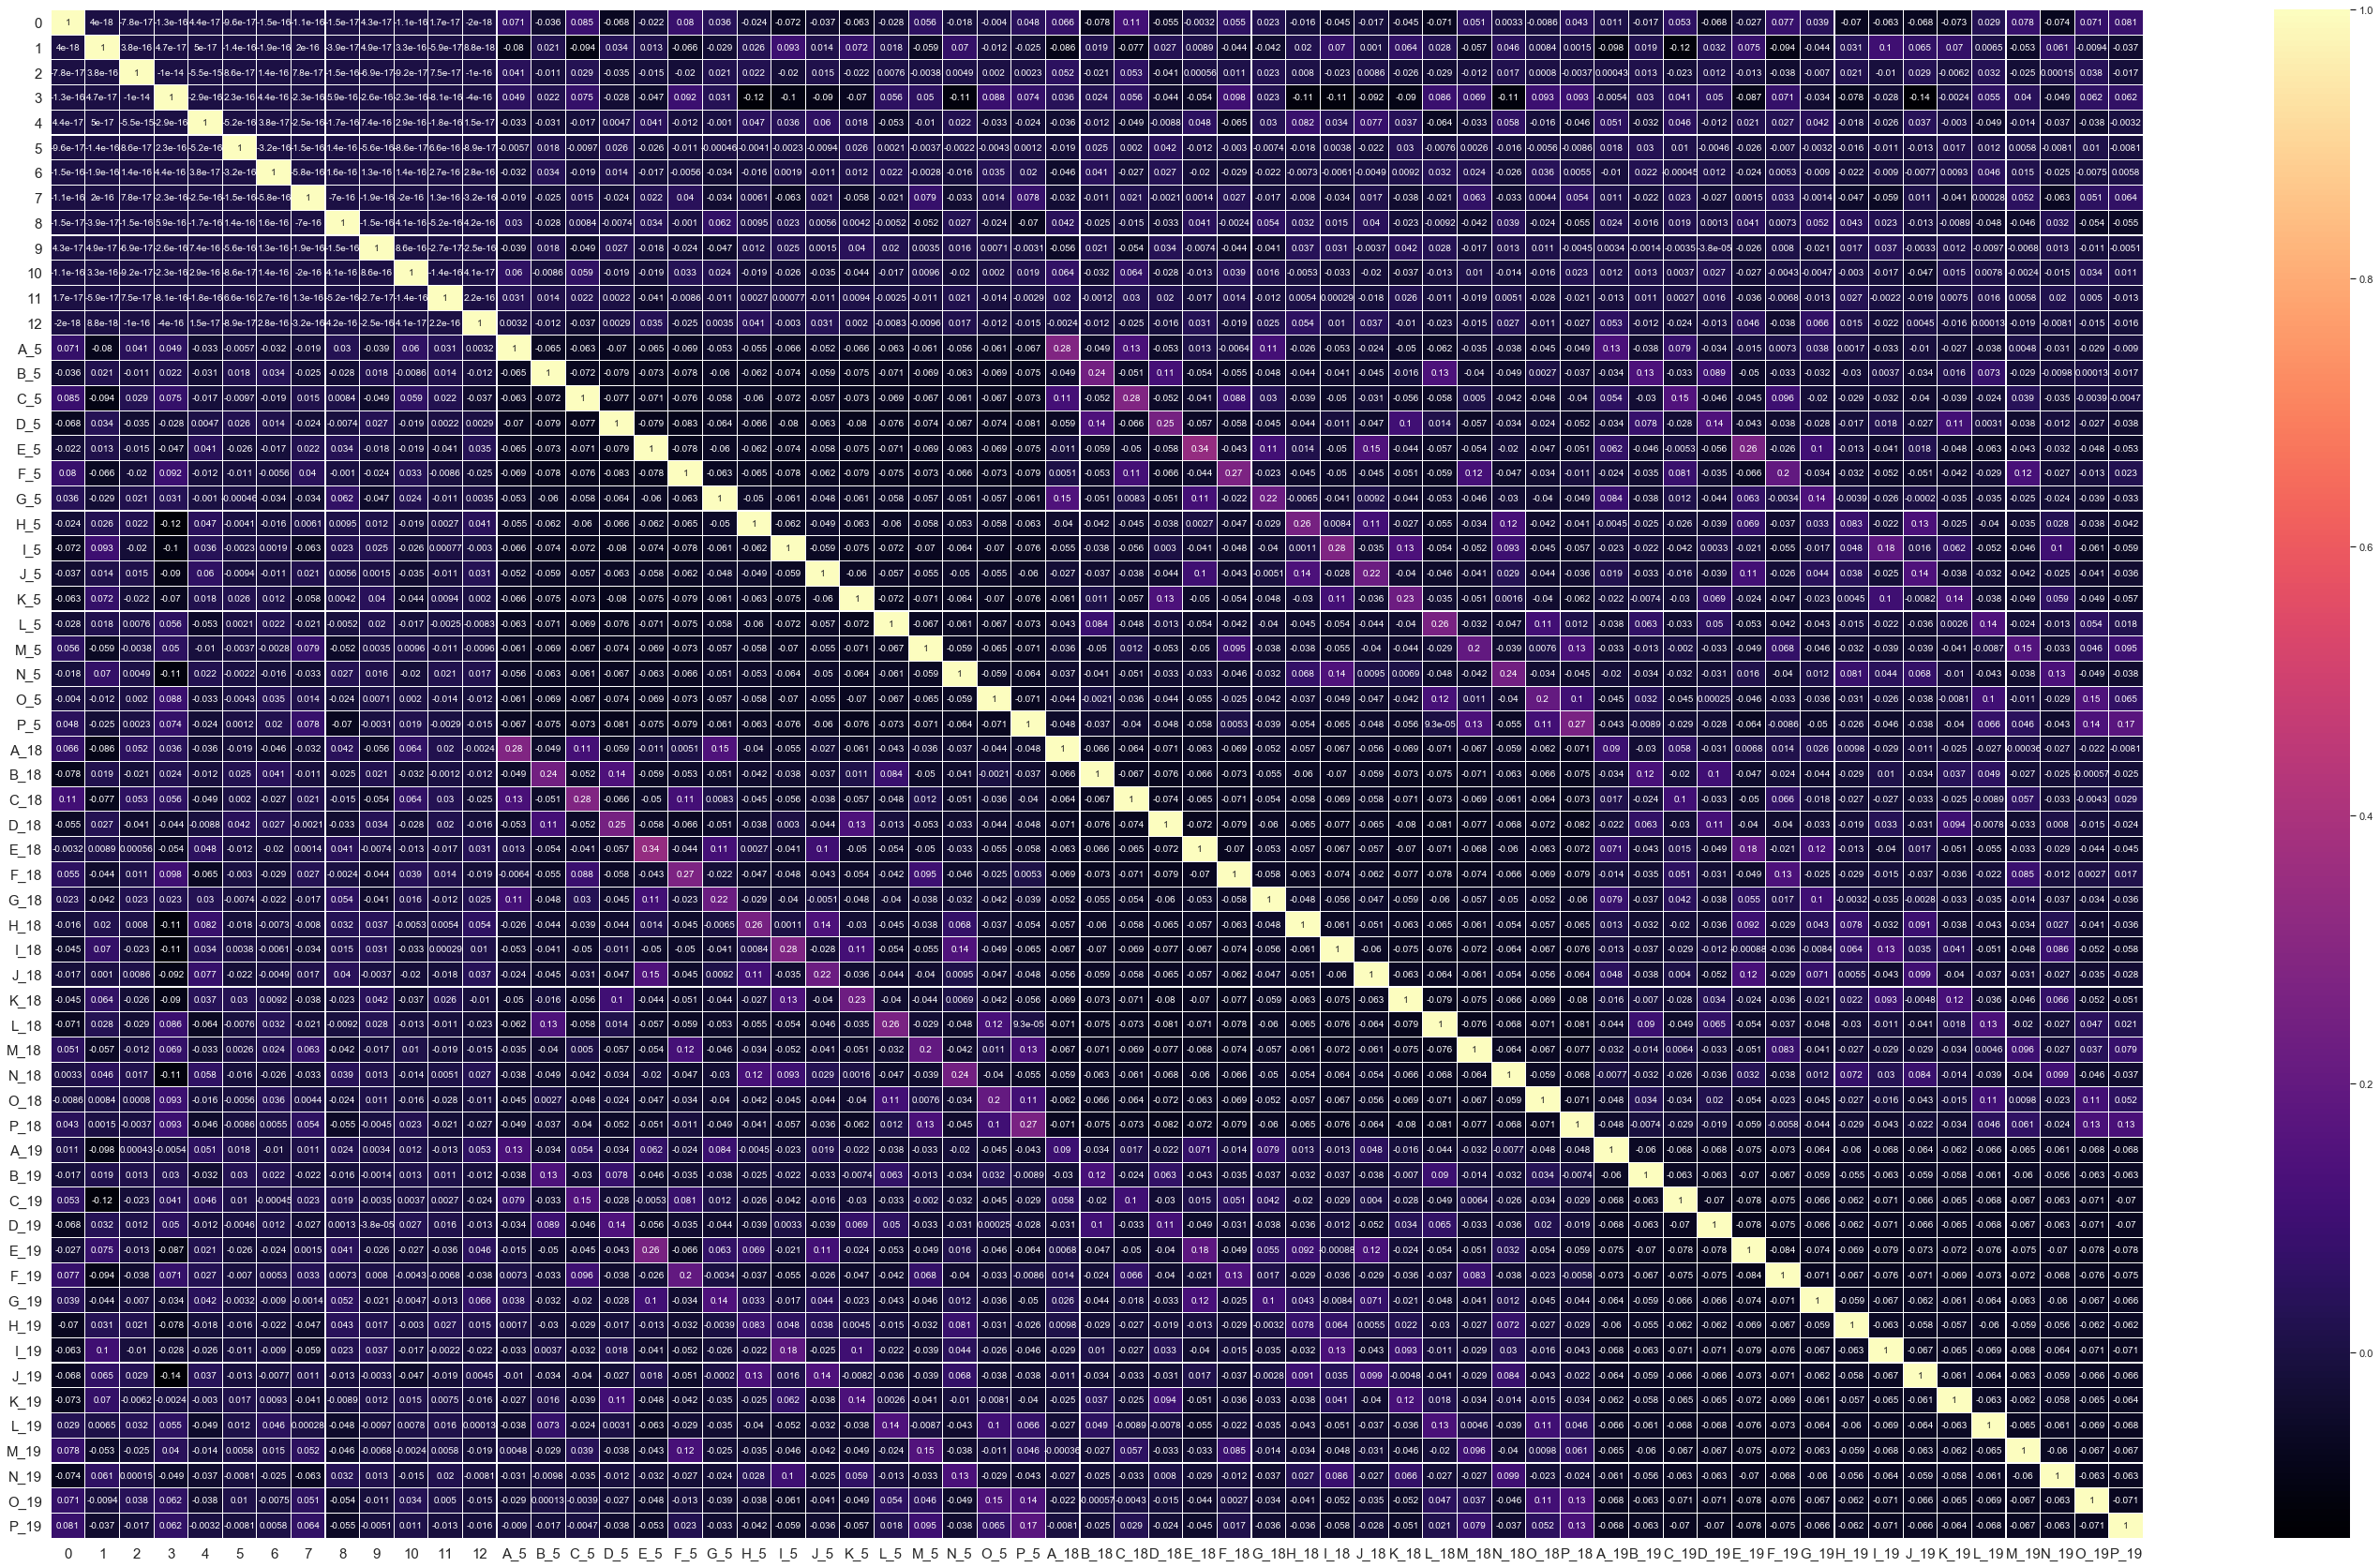

In [149]:
fix,ax = plt.subplots(figsize=(50,30))
sns.heatmap(adjusted_train_x.corr(), annot=True, lw=0.1, 
            cmap='magma', annot_kws={"size": 10})
ax.tick_params(labelsize=15)

According to heatmap, it seems that there are no correlative features at the moment. Nevertheless, we will remove possible features that have more than 0.8 correlation with other features.

In [150]:
def correlation_remove(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [151]:
adjusted_train_x = correlation_remove(adjusted_train_x, 0.8)

In [152]:
adjusted_train_x.shape

(20870, 62)

### adjust final test set

In [153]:
adjusted_test_x = adjusted_test_x[list(adjusted_train_x.columns)]

In [154]:
adjusted_test_x.shape

(7387, 62)

# 3+4 - Training models and Estimation

First, we will create several functions that will be used later in the models

### Overfitting 
comparing the ROC curves of the training set and the test (validation) set will be used for checking overfitting. If the gap is too large, we might overfitting in our model. By the way, if there is no gap at all, then we can assume that there is underfitting. In the buttom line, our goal is a small gap between these curves. 
Moreover, a good measure for overfitting is the difference between the AUC on the test set and the training set.

In [155]:
def check_overfitting(aucs_train, aucs_test):
    print('Average AUC of the training set: %s' % (np.array(aucs_train).mean()))
    print('Average AUC of the test set: %s' % (np.array(aucs_test).mean()))
    change = (np.array(aucs_train).mean()-np.array(aucs_test).mean())/np.array(aucs_test).mean()
    print('That means, a change of {:.2%}'.format(change))

### Weighted Accuracy (as requested)

 Calculate weighted accuracy as required: incorrect classification of '1' cost 5 times more than incorrect classifcation of '0'

In [156]:
def claculate_weighted_accuracy(predicted_values, y_test):
    accuracy_weight = [5 if label==1 else 1 for label in y_test] 
    accuracy = accuracy_score(predicted_values, y_test, sample_weight=accuracy_weight)
    return accuracy

In [157]:
def print_weighted_accuracy(weighted_accuracy_list, model):
    print('Weighted Accuracy Analysis - %s' % (model))
    print('\n')
    print('----------------------------------')
    for fold in range(len(weighted_accuracy_list)):        
        print("Fold %s: %s" % ((str(fold+1)), weighted_accuracy_list[fold]))
        print('\n')
    print('Average weighted accuracy: %s' % str(np.array(weighted_accuracy_list).mean()))
    print('\n')
    print('----------------------------------')

### Confusion Matrix

We need to create a confusion matrix for one of the models

In [158]:
def create_confusion_matrix(predicted_values, y_test):
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_values).ravel()
    return np.array([[tp,fp],[fn,tn]])

In [159]:
def plot_confusion_matrix(confusion_matrix_list):
    for fold in range(len(confusion_matrix_list)):        
        print("Confusion Matrix - fold %s:\n" %(str(fold+1)))
        confusion_matrix = pd.DataFrame(confusion_matrix_list[fold], index =["Predicted Positive","Predicted Negative"])
        confusion_matrix.columns = ['Actual Positive', 'Actual Negative']
        print(confusion_matrix)
        print('\n')
        print('______________________________________')

### K-Fold plot

calculate required values using k-Fold cross validation

In [160]:
def KfoldPlot(X, y, clf, k, confusion_matrix=False):
    
    kf = KFold(n_splits = k, random_state = 20, shuffle = True) # #Initializing the kfold
    tprs = []
    tprs_train = []
    aucs_train = []
    aucs_test = []
    weighted_accuracy_list = []
    confusion_matrix_list = []
    
    plt.figure(figsize=(15,10)) # create a figure object
    
    for train_index, test_index in kf.split(X): # Folds' iterations
        #Split the data to train and validation
        X_train, X_test = X[train_index], X[test_index] # insert the x values of train and validation folds 
        y_train, y_test = y[train_index], y[test_index] # insert the y values of train and validation folds 
        clf.fit(X_train, y_train) # Passing our training set to the fit method
        PredictProb = clf.predict_proba(X_test)[:, 1] # Predict new values
        PredictProb_train = clf.predict_proba(X_train)[:, 1]
        
        #Defining the variables for the graph
        FPR, TPR, thresholds = roc_curve(y_test, PredictProb) # Compute area under the receiver operating characteristic curve from prediction scores
        
        
        FPR_train, TPR_train, threshold_train = roc_curve(y_train, PredictProb_train)
        
        # Calculate weighted accuracy as required: incorrect classification of '1' cost 5 times more than incorrect classifcation of '0'
        predicted_values = clf.predict(X_test)
        accuracy = claculate_weighted_accuracy(predicted_values, y_test)
        weighted_accuracy_list.append(accuracy)
        
        # Confusion Matrix
        if confusion_matrix == True:
            confusion_matrix_list.append(create_confusion_matrix(predicted_values, y_test))
             
        #For interpolating data, setting mean tpr and mean fpr
        fpr_int = np.linspace(0, 1, 100)
        tpr_int = np.interp(fpr_int, FPR, TPR)
        tprs.append(tpr_int)

        aucs_test.append(auc(fpr_int, tpr_int))
        aucs_train.append(auc(FPR_train, TPR_train))
        
        fpr_int_train = np.linspace(0, 1, 100)
        tpr_int_train = np.interp(fpr_int_train, FPR_train, TPR_train)
        tprs_train.append(tpr_int_train)
        
        ##plotting the fold with grey color
        plt.plot(FPR, TPR, color='grey')
        
    plt.plot([0], [0], color='grey', linestyle='-', label='K-folds')  
    
    
    tpr_mean = np.mean(tprs, axis=0)
    mean_auc = auc(fpr_int, tpr_mean)
    
    tpr_mean_train = np.mean(tprs_train, axis=0)
    mean_auc_train = auc(fpr_int_train, tpr_mean_train)
    
    #Plotting the random-guess line
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    #Plotting the mean roc
    plt.plot(fpr_int, tpr_mean, color='red', linestyle='-', label='Mean Test ROC (area = %0.2f)' % mean_auc)
    
    #Plotting the train mean roc
    plt.plot(fpr_int_train, tpr_mean_train, color='green', linestyle='-', label='Mean Train ROC (area = %0.2f)' % mean_auc_train)

    #Adding titles to the graph
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    name_of_model = str(clf)[:str(clf).find("(")] 
    plt.title('ROC for ' + name_of_model) # Set the title 
    plt.legend()
    plt.show()
    if confusion_matrix == True:
        confusion_matrix = plot_confusion_matrix(confusion_matrix_list)
    return aucs_train, aucs_test, weighted_accuracy_list
        

# Basic Models

### Logistic Regression

In [161]:
hyperparameters_lg = {'penalty' : ['l1', 'l2'],
                      'C' : [0.001, 0.01,0.1, 1, 10, 100],
                      'tol' : [0.0001],
                      'max_iter' : [1000],
                      'random_state' :[20],
                      'solver' : ["liblinear"]}

kfold = KFold(n_splits = 4, random_state = 20, shuffle = True)

In [162]:
clf_lg = GridSearchCV(LogisticRegression(), hyperparameters_lg, cv = kfold, scoring = 'roc_auc', n_jobs = -1 )

In [163]:
clf_lg.fit(adjusted_train_x.values, adjusted_train_y.values)
print("tuned hpyerparameters :(best parameters) ",clf_lg.best_params_)
print("score :",clf_lg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'random_state': 20, 'solver': 'liblinear', 'tol': 0.0001}
score : 0.8796755860068375


In [164]:
clf_lg = LogisticRegression(**clf_lg.best_params_)

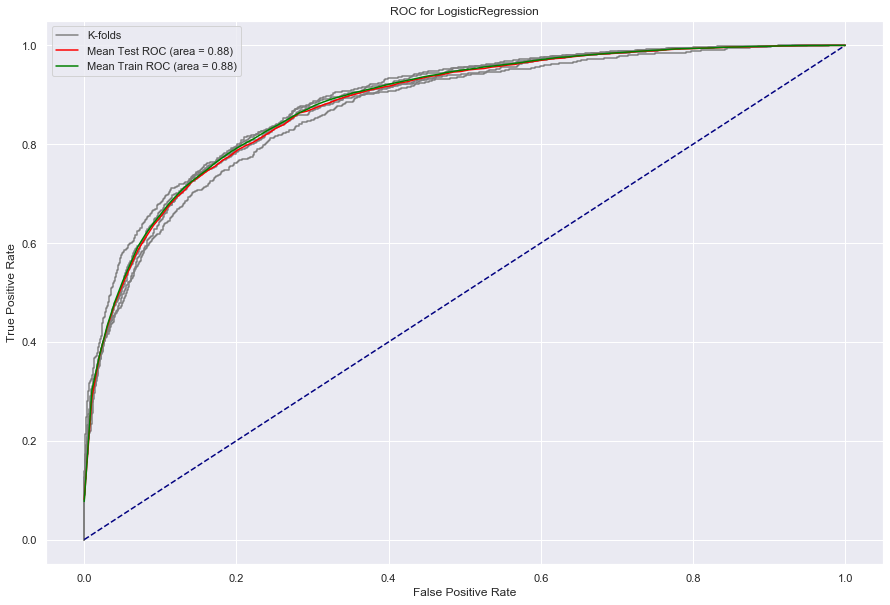

In [165]:
aucs_train_lg, aucs_test_lg, weighted_accuracy_list_lg  = KfoldPlot(adjusted_train_x.values, adjusted_train_y.values, clf_lg, 5)

In [166]:
print_weighted_accuracy(weighted_accuracy_list_lg, 'Logistic Regression')

Weighted Accuracy Analysis - Logistic Regression


----------------------------------
Fold 1: 0.7083854818523154


Fold 2: 0.7030567685589519


Fold 3: 0.6888670434996313


Fold 4: 0.7299925205684368


Fold 5: 0.6943300218076084


Average weighted accuracy: 0.7049263672573887


----------------------------------


## Check overfitting

In [167]:
check_overfitting(aucs_train_lg, aucs_test_lg)

Average AUC of the training set: 0.8823116348268603
Average AUC of the test set: 0.8794367369077604
That means, a change of 0.33%


Scores are quite similar, indicating that the model is not overfitting.

# K Nearest Neighbors 

In [168]:
hyperparameters_knn = {'n_neighbors' : [3,5,11,15], 
                       'weights' : ['uniform', 'distance'],
                       'metric' : ['euclidean', 'manhattan'],
                        'n_jobs':[-1]}

kfold = KFold(n_splits = 4, random_state = 20, shuffle = True)


In [169]:
clf_knn = GridSearchCV(KNeighborsClassifier(), hyperparameters_knn, cv = kfold, scoring = 'roc_auc', n_jobs = -1)

In [170]:
clf_knn.fit(adjusted_train_x.values, adjusted_train_y.values)
print("tuned hpyerparameters :(best parameters) ",clf_knn.best_params_)
print("score :",clf_knn.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 15, 'weights': 'distance'}
score : 0.8809875738704438


In [171]:
clf_knn = KNeighborsClassifier(**clf_knn.best_params_)

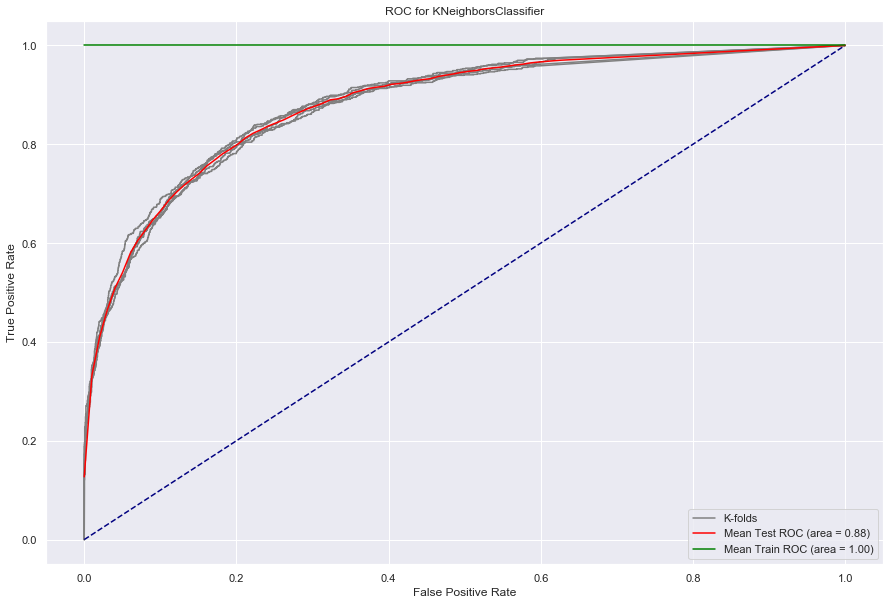

In [172]:
aucs_train_knn, aucs_test_knn, weighted_accuracy_list_knn = KfoldPlot(adjusted_train_x.values, adjusted_train_y.values, clf_knn, 5)

### Check overfitting

In [173]:
check_overfitting(aucs_train_knn, aucs_test_knn)

Average AUC of the training set: 1.0
Average AUC of the test set: 0.8815220803856351
That means, a change of 13.44%


### Gap is too large - possible overfitting?
Therefore, we believe that we might have an overfitted model. Let's decrease complexity and run a model with less parameters.

In [174]:
clf_knn_2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

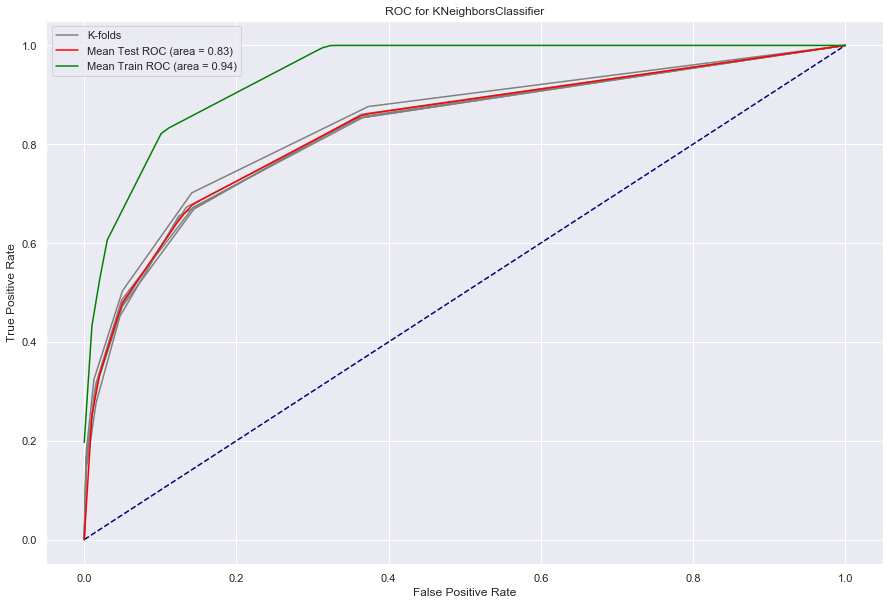

In [175]:
aucs_train_knn_2, aucs_test_knn_2, weighted_accuracy_list_knn_2 = KfoldPlot(adjusted_train_x.values, adjusted_train_y.values, clf_knn_2, 5)

In [176]:
check_overfitting(aucs_train_knn_2, aucs_test_knn_2)

Average AUC of the training set: 0.9445051371231387
Average AUC of the test set: 0.8317789902202346
That means, a change of 13.55%


### Based on the new results, it seems that we might have overfitted the training set. Neverhteless, the model still has a quite good AUC score.

Therefore, let's calculate the weighted accuracy for this model

In [177]:
print_weighted_accuracy(weighted_accuracy_list_knn, 'K Nearest Neighbors')

Weighted Accuracy Analysis - K Nearest Neighbors


----------------------------------
Fold 1: 0.6713391739674593


Fold 2: 0.6843051631132803


Fold 3: 0.6724010813467682


Fold 4: 0.6985789080029918


Fold 5: 0.656287860431306


Average weighted accuracy: 0.6765824373723611


----------------------------------


# ANN

In [178]:
hyperparameters_NN = {'activation' : ["logistic"], #
                      'hidden_layer_sizes' : [(80,), # 1 large hidden layer
                                             (50, 50), # 2 medium size layers
                                             (20, 20, 10, 10, 10)], # multiple small sized layers
                      'batch_size' : [10, 50],
                      'learning_rate_init' : [0.1, 0.01], 
                      'max_iter' : [500],
                        'random_state' :[20]}

kfold = KFold(n_splits = 5, random_state = 20, shuffle=True)

In [179]:
clf_NN = GridSearchCV(MLPClassifier(), hyperparameters_NN, cv = kfold, scoring = 'roc_auc', n_jobs = -1)

In [180]:
clf_NN.fit(adjusted_train_x.values, adjusted_train_y.values)
print("tuned hpyerparameters :(best parameters) ",clf_NN.best_params_)
print("score :",clf_NN.best_score_)

tuned hpyerparameters :(best parameters)  {'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 20}
score : 0.882981316696213


In [181]:
clf_NN = MLPClassifier(**clf_NN.best_params_)

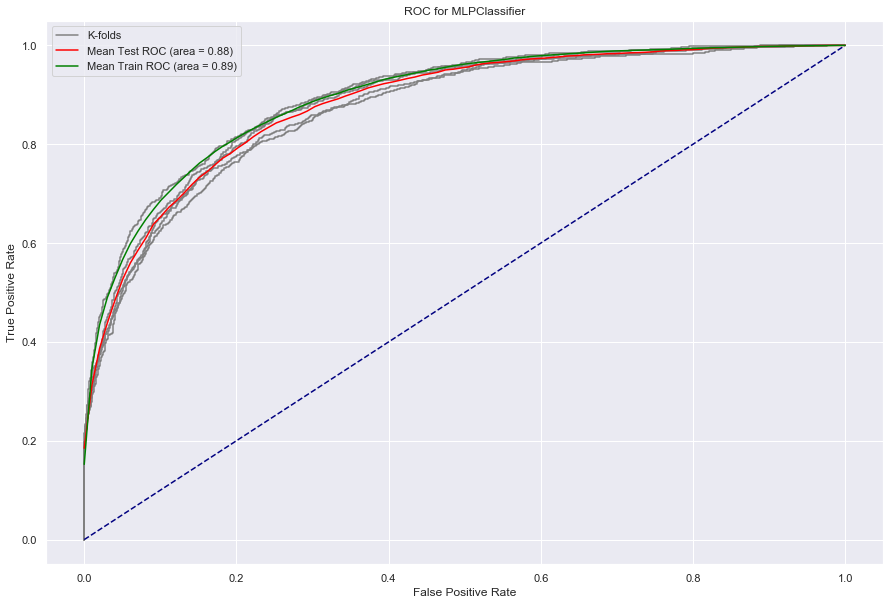

In [182]:
aucs_train_NN, aucs_test_NN, weighted_accuracy_list_NN = KfoldPlot(adjusted_train_x.values, adjusted_train_y.values, clf_NN, 5)

### Check overfitting

In [183]:
check_overfitting(aucs_train_NN, aucs_test_NN)

Average AUC of the training set: 0.8943289919274691
Average AUC of the test set: 0.8828147030494975
That means, a change of 1.30%


Scores are quite similar, indicating that the model is not overfitting.

In [184]:
print_weighted_accuracy(weighted_accuracy_list_NN, 'Artificial Neural Network')

Weighted Accuracy Analysis - Artificial Neural Network


----------------------------------
Fold 1: 0.7176470588235294


Fold 2: 0.708451066015926


Fold 3: 0.7118456623248955


Fold 4: 0.662303664921466


Fold 5: 0.6063726677974316


Average weighted accuracy: 0.6813240239766497


----------------------------------


## Random Forest

In [185]:
hyperparameters_RF = {'min_samples_split':[2, 4, 8, 12], 
                     'max_depth':[5,10,20],
                     'criterion':['gini', 'entropy'],
                     'n_estimators':[30], 
                     'random_state':[20]}

kfold = KFold(n_splits = 5, random_state = 20, shuffle=True)

In [186]:
clf_RF = GridSearchCV(RandomForestClassifier(), hyperparameters_RF, cv = kfold, scoring='roc_auc',n_jobs = -1)

In [187]:
clf_RF.fit(adjusted_train_x.values, adjusted_train_y.values)
print("tuned hpyerparameters :(best parameters) ",clf_RF.best_params_)
print("score :",clf_RF.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 12, 'n_estimators': 30, 'random_state': 20}
score : 0.8809072235926839


In [188]:
clf_RF = RandomForestClassifier(**clf_RF.best_params_)

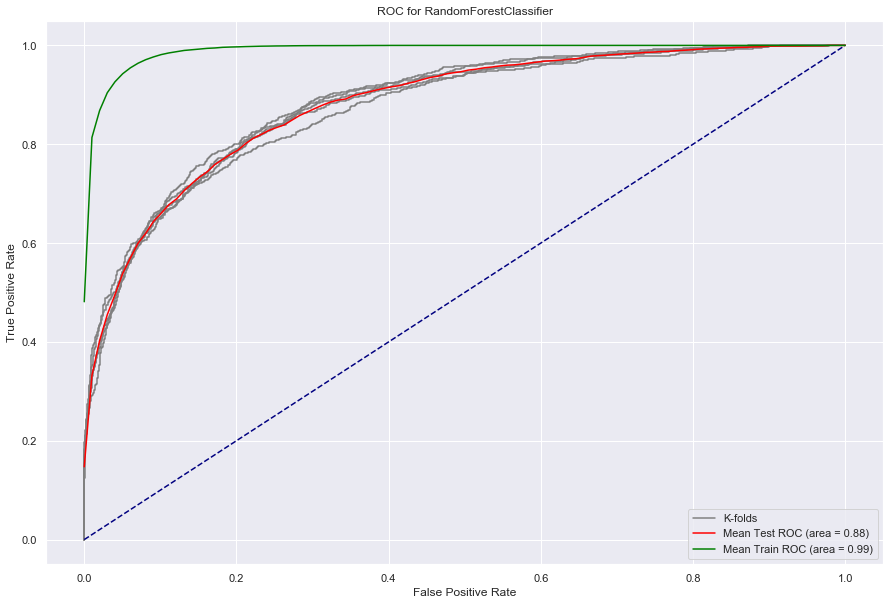

In [189]:
aucs_train_RF, aucs_test_RF, weighted_accuracy_list_RF = KfoldPlot(adjusted_train_x.values, adjusted_train_y.values, clf_RF, 5)

### Check overfitting

In [190]:
check_overfitting(aucs_train_RF, aucs_test_RF)

Average AUC of the training set: 0.9904731354885264
Average AUC of the test set: 0.8805944075253024
That means, a change of 12.48%


### Gap is too large - possible overfitting?
Therefore, we believe that we might have an overfitted model. Let's decrease complexity and run a model with less hyperparameters.

In [191]:
clf_RF_2 = RandomForestClassifier(criterion='entropy',
                                 max_depth=10,
                                 min_samples_split=4,
                                 n_estimators=30,
                                 random_state=20)

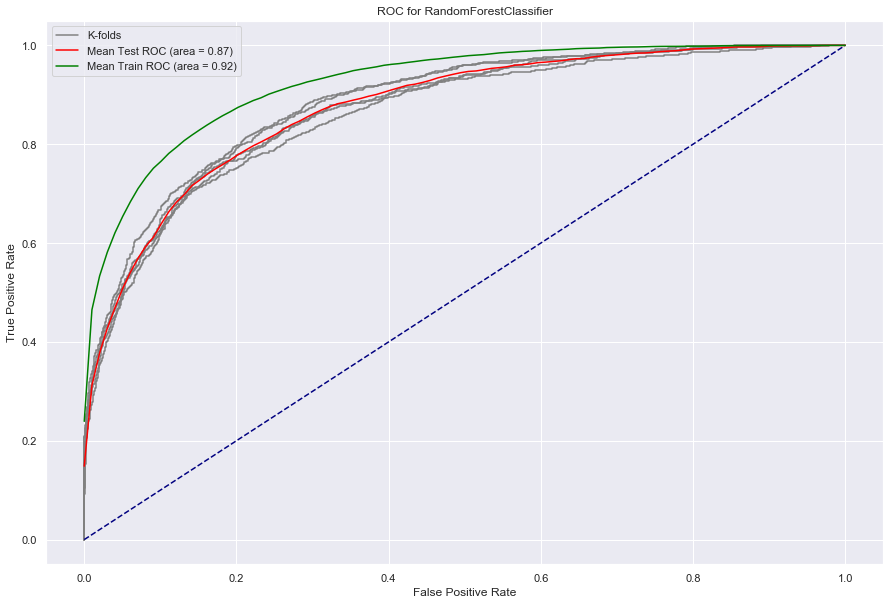

In [192]:
aucs_train_RF_2, aucs_test_RF_2, weighted_accuracy_list_RF_2 = KfoldPlot(adjusted_train_x.values, adjusted_train_y.values, clf_RF_2, 5)

In [193]:
check_overfitting(aucs_train_RF_2, aucs_test_RF_2)

Average AUC of the training set: 0.9245965909441202
Average AUC of the test set: 0.8743408468304356
That means, a change of 5.75%


### Based on the new results, it seems that our model is fine and it is not overfitted.

Therefore, let's calculate the weighted accuracy for this model

In [194]:
print_weighted_accuracy(weighted_accuracy_list_RF, 'Random Forest')

Weighted Accuracy Analysis - Random Forest


----------------------------------
Fold 1: 0.6785982478097622


Fold 2: 0.6920113023375289


Fold 3: 0.6778078151880069


Fold 4: 0.693717277486911


Fold 5: 0.6524109522655682


Average weighted accuracy: 0.6789091190175556


----------------------------------


# XGBoost

In [195]:
hyperparameters_XGB = {
        'min_child_weight': [1, 5, 8],
        'gamma': [0.5, 1, 2],
        'subsample': [0.6, 0.9],
        'colsample_bytree': [0.6, 0.9],
        'max_depth': [3, 5]
        }

kfold = KFold(n_splits = 5, random_state = 20, shuffle=True)

In [196]:
clf_XGB = GridSearchCV(XGBClassifier(), hyperparameters_XGB, cv = kfold, scoring='roc_auc',n_jobs = -1)

In [197]:
clf_XGB.fit(adjusted_train_x.values, adjusted_train_y.values)
print("tuned hpyerparameters :(best parameters) ",clf_XGB.best_params_)
print("score :",clf_XGB.best_score_)

tuned hpyerparameters :(best parameters)  {'colsample_bytree': 0.9, 'gamma': 2, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
score : 0.8909371986188607


In [198]:
clf_XGB = XGBClassifier(**clf_XGB.best_params_)

In this case, let's also plot the confusion matrix for each fold.

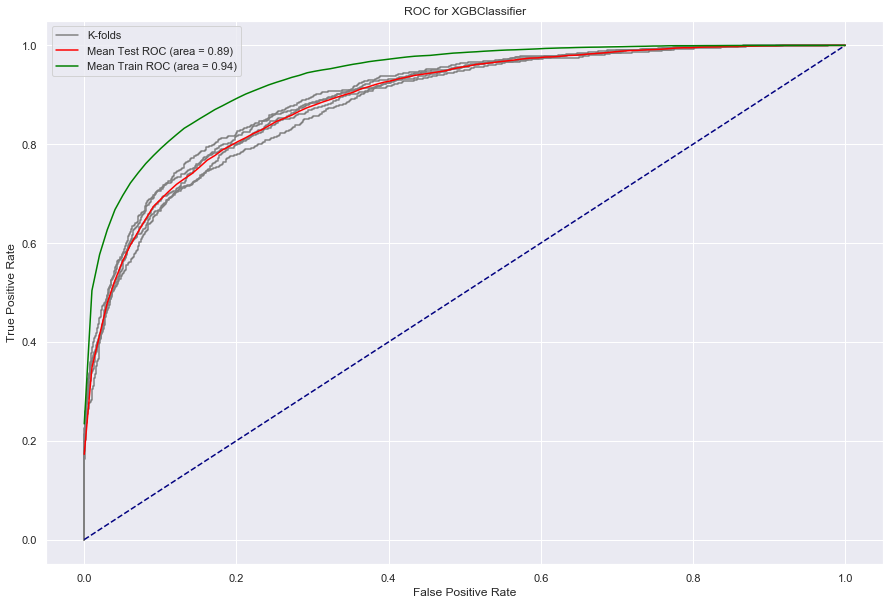

Confusion Matrix - fold 1:

                    Actual Positive  Actual Negative
Predicted Positive              558              180
Predicted Negative              396             3040


______________________________________
Confusion Matrix - fold 2:

                    Actual Positive  Actual Negative
Predicted Positive              499              180
Predicted Negative              404             3091


______________________________________
Confusion Matrix - fold 3:

                    Actual Positive  Actual Negative
Predicted Positive              574              178
Predicted Negative              417             3005


______________________________________
Confusion Matrix - fold 4:

                    Actual Positive  Actual Negative
Predicted Positive              559              175
Predicted Negative              403             3037


______________________________________
Confusion Matrix - fold 5:

                    Actual Positive  Actual Negative
Predict

In [199]:
aucs_train_XGB, aucs_test_XGB, weighted_accuracy_list_XGB = KfoldPlot(adjusted_train_x.values, adjusted_train_y.values, clf_XGB, 5, confusion_matrix=True)

### Check overfitting

In [200]:
check_overfitting(aucs_train_XGB, aucs_test_XGB)

Average AUC of the training set: 0.9358076341489319
Average AUC of the test set: 0.890628634095977
That means, a change of 5.07%


Scores are quite similar, indicating that the model is not overfitting.

In [201]:
print_weighted_accuracy(weighted_accuracy_list_XGB, 'XGBoost')

Weighted Accuracy Analysis - XGBoost


----------------------------------
Fold 1: 0.7296620775969962


Fold 2: 0.7174415617775495


Fold 3: 0.7219218481199312


Fold 4: 0.7270007479431563


Fold 5: 0.716258783620063


Average weighted accuracy: 0.7224570038115392


----------------------------------


# Predictinos

Based on the above, the selected model is XGBoost which provided the best perforamcne. We will predict our test labels with the selected classifier.

In [202]:
predictions = clf_XGB.predict_proba(adjusted_test_x.values)
predictionsDF = pd.DataFrame(predictions, columns=['Probability for 0', 'Probability for 1'])
final_pred = predictionsDF.rename({'Probability for 1':'pred_proba'}, axis=1)['pred_proba']
final_pred.to_csv('Submission_group_9.csv')